# Performance Prediction Under Dataset Shift

Comparison of different types of Performance Predictors under dataset shift.

Results of paper "Performance Prediction Under Dataset Shift"

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import pickle
from drift_dac_experiments.viz_utils import name2type
import matplotlib.patches as mpatches
from scipy import stats

In [3]:
datasets = [
        'adult',
        'video_games',
        'heart',
        'bank',
        'bng_zoo',
        'jsbach_chorals_modified',
        'SDSS',
        'bng_ionosphere',
        'artificial_characters',
        'default_of_credit_card_clients'
    ]

Load results

In [4]:
df = pd.DataFrame(columns=['dataset', 'ref. accuracy', 'CI'])
df_test_no_shift = pd.DataFrame()
df_test = pd.DataFrame()
df_test_unseen = pd.DataFrame()
df_test_unseen_subpop = pd.DataFrame()
df_test_natural = pd.DataFrame()

sets = ['train', 'test', 'test_no_shift', 'test_unseen', 'test_unseen_subpop', 'test_natural']

for i, ds in enumerate(datasets):
    
    data_fld = ds
    pp_fld = ds + '_pp'
    
    print(data_fld.upper())
    
    try:
    
        all_ref_accuracies = []
        all_ci_drops = []
        for seed in range(10):
            with open(os.path.join(data_fld, './data_%d.pkl' % seed), 'rb') as f:
                train, test, test_unseen, test_natural, ref_task, _ = pickle.load(f)

            with open(os.path.join(data_fld, './shifts_%d.pkl' % seed), 'rb') as f:
                list_of_drift_types, filtered_list_of_train_shifts, filtered_list_of_test_shifts, filtered_list_of_unseen_shifts = pickle.load(f)

            train_shifts_names = [name2type(s) for s in filtered_list_of_train_shifts]
            test_shifts_names = [name2type(s) for s in filtered_list_of_test_shifts]

            ref_accuracy = ref_task.ref_accuracy

            alpha = 0.05
            n_samples = ref_task.y_src.shape[0]
            sigma = np.sqrt(ref_accuracy * (1 - ref_accuracy) / n_samples)
            ci_drop = stats.norm.ppf(1 - alpha / 2) * sigma

            all_ref_accuracies.append(ref_accuracy)
            all_ci_drops.append(ci_drop)


        new_row = {
         "dataset": data_fld,
         "ref. accuracy": '%.3f \tiny{$\pm$%.3f}' % (np.mean(all_ref_accuracies), np.std(all_ref_accuracies)),
         "CI": '%.3f \tiny{$\pm$%.3f}' % (np.mean(all_ci_drops), np.std(all_ci_drops))
          }
        df = df.append(new_row, ignore_index=True)
        
        with open(os.path.join(pp_fld, './model_names.npy'), 'rb') as f:
            model_names = np.load(f)

        for j, s in enumerate(sets):

            with open(os.path.join(pp_fld, './r2_score_%s.npy'%s), 'rb') as f:
                r2_score = np.load(f)

            with open(os.path.join(pp_fld, './within_ci_mae_%s.npy'%s), 'rb') as f:
                within_ci_mae = np.load(f)

            with open(os.path.join(pp_fld, './likelihood_%s.npy'%s), 'rb') as f:
                likelihood = np.load(f)

            for i, name in enumerate(model_names):
                new_row = {"dataset": ds, 'model': name}

                new_row['mae_within_ci'] = '%.3f \tiny{$\pm$ %.3f}' % (np.mean(within_ci_mae[:, i]), np.std(within_ci_mae[:, i]))

                if s=='test':
                    df_test = df_test.append(new_row, ignore_index=True)
                elif s=='test_no_shift':
                    df_test_no_shift = df_test_no_shift.append(new_row, ignore_index=True)
                elif s=='test_unseen':
                    df_test_unseen = df_test_unseen.append(new_row, ignore_index=True)
                elif s=='test_unseen_subpop':
                    df_test_unseen_subpop = df_test_unseen_subpop.append(new_row, ignore_index=True)
                elif s=='test_natural':
                    df_test_natural = df_test_natural.append(new_row, ignore_index=True)
                    
    except Exception as e:
        print(e)
        print("SKIP")
        continue
        

ADULT


Using TensorFlow backend.


VIDEO_GAMES
HEART
BANK
BNG_ZOO
JSBACH_CHORALS_MODIFIED
SDSS
BNG_IONOSPHERE
ARTIFICIAL_CHARACTERS
DEFAULT_OF_CREDIT_CARD_CLIENTS


DataFrame with datasets accuracies and confidence intervals

In [5]:
df

dataset            ref. accuracy  \
0                           adult  0.829 \tiny{$\pm$0.016}   
1                     video_games  0.796 \tiny{$\pm$0.019}   
2                           heart  0.707 \tiny{$\pm$0.013}   
3                            bank  0.983 \tiny{$\pm$0.004}   
4                         bng_zoo  0.916 \tiny{$\pm$0.012}   
5         jsbach_chorals_modified  0.835 \tiny{$\pm$0.013}   
6                            SDSS  0.985 \tiny{$\pm$0.004}   
7                  bng_ionosphere  0.931 \tiny{$\pm$0.014}   
8           artificial_characters  0.569 \tiny{$\pm$0.026}   
9  default_of_credit_card_clients  0.827 \tiny{$\pm$0.007}   

                        CI  
0  0.033 \tiny{$\pm$0.001}  
1  0.036 \tiny{$\pm$0.001}  
2  0.028 \tiny{$\pm$0.000}  
3  0.008 \tiny{$\pm$0.001}  
4  0.017 \tiny{$\pm$0.001}  
5  0.034 \tiny{$\pm$0.001}  
6  0.011 \tiny{$\pm$0.002}  
7  0.022 \tiny{$\pm$0.002}  
8  0.044 \tiny{$\pm$0.000}  
9  0.023 \tiny{$\pm$0.000}

In [6]:
print(df.to_latex(index=False).replace('textbackslash ','').replace('\$','$').replace('\{','{').replace('\}', '}'))

\begin{tabular}{lll}
\toprule
                        dataset &            ref. accuracy &                       CI \\
\midrule
                          adult &  0.829 \tiny{$\pm$0.016} &  0.033 \tiny{$\pm$0.001} \\
                    video\_games &  0.796 \tiny{$\pm$0.019} &  0.036 \tiny{$\pm$0.001} \\
                          heart &  0.707 \tiny{$\pm$0.013} &  0.028 \tiny{$\pm$0.000} \\
                           bank &  0.983 \tiny{$\pm$0.004} &  0.008 \tiny{$\pm$0.001} \\
                        bng\_zoo &  0.916 \tiny{$\pm$0.012} &  0.017 \tiny{$\pm$0.001} \\
        jsbach\_chorals\_modified &  0.835 \tiny{$\pm$0.013} &  0.034 \tiny{$\pm$0.001} \\
                           SDSS &  0.985 \tiny{$\pm$0.004} &  0.011 \tiny{$\pm$0.002} \\
                 bng\_ionosphere &  0.931 \tiny{$\pm$0.014} &  0.022 \tiny{$\pm$0.002} \\
          artificial\_characters &  0.569 \tiny{$\pm$0.026} &  0.044 \tiny{$\pm$0.000} \\
 default\_of\_credit\_card\_clients &  0.827 \tiny{$\pm$0.007} & 

DataFrame with MAE_CI_0.05 results for test_no_shift for all datasets

In [7]:
selected_models = ['ATC', 'ExpertRF (amazon)', 'ExpertRF (naver)', 'ErrorPredictorRF']

In [8]:
d = df_test_no_shift[df_test_no_shift['model'].isin(selected_models)].set_index(['dataset', 'model']).stack().unstack([1,2])
d = d[selected_models]
d = d.iloc[d.index.str.lower().argsort()]
d

model                                                ATC  \
                                           mae_within_ci   
dataset                                                    
adult                           0.001 \tiny{$\pm$ 0.002}   
artificial_characters           0.001 \tiny{$\pm$ 0.002}   
bank                            0.002 \tiny{$\pm$ 0.003}   
bng_ionosphere                  0.001 \tiny{$\pm$ 0.002}   
bng_zoo                         0.003 \tiny{$\pm$ 0.005}   
default_of_credit_card_clients  0.002 \tiny{$\pm$ 0.005}   
heart                           0.004 \tiny{$\pm$ 0.007}   
jsbach_chorals_modified         0.003 \tiny{$\pm$ 0.008}   
SDSS                            0.001 \tiny{$\pm$ 0.004}   
video_games                     0.003 \tiny{$\pm$ 0.006}   

model                                  ExpertRF (amazon)  \
                                           mae_within_ci   
dataset                                                    
adult                           0.014 \tiny{$\pm$ 0.017}   
artificial_characters           0.130 \tiny{$\pm$ 0.043}   
bank                            0.000 \tiny{$\pm$ 0.000}   
bng_ionosphere                  0.228 \tiny{$\pm$ 0.082}   
bng_zoo                         0.194 \tiny{$\pm$ 0.062}   
default_of_credit_card_clients  0.099 \tiny{$\pm$ 0.092}   
heart                           0.071 \tiny{$\pm$ 0.026}   
jsbach_chorals_modified         0.269 \tiny{$\pm$ 0.137}   
SDSS                            0.186 \tiny{$\pm$ 0.073}   
video_games                     0.028 \tiny{$\pm$ 0.027}   

model                                   ExpertRF (naver)  \
                                           mae_within_ci   
dataset                                                    
adult                           0.007 \tiny{$\pm$ 0.011}   
artificial_characters           0.147 \tiny{$\pm$ 0.076}   
bank                            0.000 \tiny{$\pm$ 0.000}   
bng_ionosphere                  0.138 \tiny{$\pm$ 0.060}   
bng_zoo                         0.165 \tiny{$\pm$ 0.098}   
default_of_credit_card_clients  0.040 \tiny{$\pm$ 0.036}   
heart                           0.063 \tiny{$\pm$ 0.033}   
jsbach_chorals_modified         0.116 \tiny{$\pm$ 0.067}   
SDSS                            0.182 \tiny{$\pm$ 0.076}   
video_games                     0.034 \tiny{$\pm$ 0.034}   

model                                   ErrorPredictorRF  
                                           mae_within_ci  
dataset                                                   
adult                           0.000 \tiny{$\pm$ 0.000}  
artificial_characters           0.042 \tiny{$\pm$ 0.030}  
bank                            0.000 \tiny{$\pm$ 0.000}  
bng_ionosphere                  0.000 \tiny{$\pm$ 0.000}  
bng_zoo                         0.037 \tiny{$\pm$ 0.009}  
default_of_credit_card_clients  0.010 \tiny{$\pm$ 0.007}  
heart                           0.002 \tiny{$\pm$ 0.005}  
jsbach_chorals_modified         0.000 \tiny{$\pm$ 0.000}  
SDSS                            0.002 \tiny{$\pm$ 0.002}  
video_games                     0.005 \tiny{$\pm$ 0.008}

In [9]:
print(d.to_latex().replace('textbackslash ','').replace('\$','$').replace('\{','{').replace('\}', '}'))

\begin{tabular}{lllll}
\toprule
model &                       ATC &         ExpertRF (amazon) &          ExpertRF (naver) &          ErrorPredictorRF \\
{} &             mae\_within\_ci &             mae\_within\_ci &             mae\_within\_ci &             mae\_within\_ci \\
dataset                        &                           &                           &                           &                           \\
\midrule
adult                          &  0.001 \tiny{$\pm$ 0.002} &  0.014 \tiny{$\pm$ 0.017} &  0.007 \tiny{$\pm$ 0.011} &  0.000 \tiny{$\pm$ 0.000} \\
artificial\_characters          &  0.001 \tiny{$\pm$ 0.002} &  0.130 \tiny{$\pm$ 0.043} &  0.147 \tiny{$\pm$ 0.076} &  0.042 \tiny{$\pm$ 0.030} \\
bank                           &  0.002 \tiny{$\pm$ 0.003} &  0.000 \tiny{$\pm$ 0.000} &  0.000 \tiny{$\pm$ 0.000} &  0.000 \tiny{$\pm$ 0.000} \\
bng\_ionosphere                 &  0.001 \tiny{$\pm$ 0.002} &  0.228 \tiny{$\pm$ 0.082} &  0.138 \tiny{$\pm$ 0.060} &  0.000 \t

DataFrame with MAE_CI_0.05 results for test_unseen_severity for all datasets

In [10]:
d = df_test[df_test['model'].isin(selected_models)].set_index(['dataset', 'model']).stack().unstack([1,2])
d = d[selected_models]
d = d.iloc[d.index.str.lower().argsort()]
d

model                                                ATC  \
                                           mae_within_ci   
dataset                                                    
adult                           0.031 \tiny{$\pm$ 0.022}   
artificial_characters           0.055 \tiny{$\pm$ 0.014}   
bank                            0.040 \tiny{$\pm$ 0.010}   
bng_ionosphere                  0.132 \tiny{$\pm$ 0.013}   
bng_zoo                         0.032 \tiny{$\pm$ 0.014}   
default_of_credit_card_clients  0.136 \tiny{$\pm$ 0.019}   
heart                           0.070 \tiny{$\pm$ 0.011}   
jsbach_chorals_modified         0.025 \tiny{$\pm$ 0.012}   
SDSS                            0.086 \tiny{$\pm$ 0.010}   
video_games                     0.039 \tiny{$\pm$ 0.009}   

model                                  ExpertRF (amazon)  \
                                           mae_within_ci   
dataset                                                    
adult                           0.010 \tiny{$\pm$ 0.008}   
artificial_characters           0.046 \tiny{$\pm$ 0.010}   
bank                            0.001 \tiny{$\pm$ 0.001}   
bng_ionosphere                  0.184 \tiny{$\pm$ 0.048}   
bng_zoo                         0.112 \tiny{$\pm$ 0.018}   
default_of_credit_card_clients  0.054 \tiny{$\pm$ 0.041}   
heart                           0.028 \tiny{$\pm$ 0.006}   
jsbach_chorals_modified         0.154 \tiny{$\pm$ 0.062}   
SDSS                            0.115 \tiny{$\pm$ 0.015}   
video_games                     0.012 \tiny{$\pm$ 0.009}   

model                                   ExpertRF (naver)  \
                                           mae_within_ci   
dataset                                                    
adult                           0.010 \tiny{$\pm$ 0.011}   
artificial_characters           0.059 \tiny{$\pm$ 0.012}   
bank                            0.000 \tiny{$\pm$ 0.001}   
bng_ionosphere                  0.133 \tiny{$\pm$ 0.025}   
bng_zoo                         0.127 \tiny{$\pm$ 0.031}   
default_of_credit_card_clients  0.046 \tiny{$\pm$ 0.032}   
heart                           0.029 \tiny{$\pm$ 0.008}   
jsbach_chorals_modified         0.080 \tiny{$\pm$ 0.025}   
SDSS                            0.126 \tiny{$\pm$ 0.022}   
video_games                     0.010 \tiny{$\pm$ 0.006}   

model                                   ErrorPredictorRF  
                                           mae_within_ci  
dataset                                                   
adult                           0.001 \tiny{$\pm$ 0.000}  
artificial_characters           0.015 \tiny{$\pm$ 0.012}  
bank                            0.000 \tiny{$\pm$ 0.000}  
bng_ionosphere                  0.044 \tiny{$\pm$ 0.006}  
bng_zoo                         0.023 \tiny{$\pm$ 0.006}  
default_of_credit_card_clients  0.005 \tiny{$\pm$ 0.002}  
heart                           0.004 \tiny{$\pm$ 0.001}  
jsbach_chorals_modified         0.001 \tiny{$\pm$ 0.001}  
SDSS                            0.018 \tiny{$\pm$ 0.002}  
video_games                     0.003 \tiny{$\pm$ 0.003}

In [11]:
print(d.to_latex().replace('textbackslash ','').replace('\$','$').replace('\{','{').replace('\}', '}'))

\begin{tabular}{lllll}
\toprule
model &                       ATC &         ExpertRF (amazon) &          ExpertRF (naver) &          ErrorPredictorRF \\
{} &             mae\_within\_ci &             mae\_within\_ci &             mae\_within\_ci &             mae\_within\_ci \\
dataset                        &                           &                           &                           &                           \\
\midrule
adult                          &  0.031 \tiny{$\pm$ 0.022} &  0.010 \tiny{$\pm$ 0.008} &  0.010 \tiny{$\pm$ 0.011} &  0.001 \tiny{$\pm$ 0.000} \\
artificial\_characters          &  0.055 \tiny{$\pm$ 0.014} &  0.046 \tiny{$\pm$ 0.010} &  0.059 \tiny{$\pm$ 0.012} &  0.015 \tiny{$\pm$ 0.012} \\
bank                           &  0.040 \tiny{$\pm$ 0.010} &  0.001 \tiny{$\pm$ 0.001} &  0.000 \tiny{$\pm$ 0.001} &  0.000 \tiny{$\pm$ 0.000} \\
bng\_ionosphere                 &  0.132 \tiny{$\pm$ 0.013} &  0.184 \tiny{$\pm$ 0.048} &  0.133 \tiny{$\pm$ 0.025} &  0.044 \t

DataFrame with MAE_CI_0.05 results for test_unseen_perturbation_shift for all datasets

In [12]:
d = df_test_unseen[df_test_unseen['model'].isin(selected_models)].set_index(['dataset', 'model']).stack().unstack([1,2])
d = d[selected_models]
d = d.iloc[d.index.str.lower().argsort()]
d

model                                                ATC  \
                                           mae_within_ci   
dataset                                                    
adult                           0.024 \tiny{$\pm$ 0.006}   
artificial_characters           0.027 \tiny{$\pm$ 0.004}   
bank                            0.042 \tiny{$\pm$ 0.014}   
bng_ionosphere                  0.001 \tiny{$\pm$ 0.002}   
bng_zoo                         0.086 \tiny{$\pm$ 0.014}   
default_of_credit_card_clients  0.100 \tiny{$\pm$ 0.009}   
heart                           0.057 \tiny{$\pm$ 0.013}   
jsbach_chorals_modified         0.004 \tiny{$\pm$ 0.008}   
SDSS                            0.120 \tiny{$\pm$ 0.015}   
video_games                     0.040 \tiny{$\pm$ 0.016}   

model                                  ExpertRF (amazon)  \
                                           mae_within_ci   
dataset                                                    
adult                           0.015 \tiny{$\pm$ 0.012}   
artificial_characters           0.076 \tiny{$\pm$ 0.009}   
bank                            0.003 \tiny{$\pm$ 0.004}   
bng_ionosphere                  0.228 \tiny{$\pm$ 0.082}   
bng_zoo                         0.127 \tiny{$\pm$ 0.020}   
default_of_credit_card_clients  0.071 \tiny{$\pm$ 0.046}   
heart                           0.043 \tiny{$\pm$ 0.013}   
jsbach_chorals_modified         0.272 \tiny{$\pm$ 0.112}   
SDSS                            0.138 \tiny{$\pm$ 0.017}   
video_games                     0.014 \tiny{$\pm$ 0.011}   

model                                   ExpertRF (naver)  \
                                           mae_within_ci   
dataset                                                    
adult                           0.012 \tiny{$\pm$ 0.007}   
artificial_characters           0.082 \tiny{$\pm$ 0.012}   
bank                            0.003 \tiny{$\pm$ 0.004}   
bng_ionosphere                  0.138 \tiny{$\pm$ 0.063}   
bng_zoo                         0.152 \tiny{$\pm$ 0.023}   
default_of_credit_card_clients  0.048 \tiny{$\pm$ 0.032}   
heart                           0.044 \tiny{$\pm$ 0.013}   
jsbach_chorals_modified         0.112 \tiny{$\pm$ 0.044}   
SDSS                            0.150 \tiny{$\pm$ 0.014}   
video_games                     0.015 \tiny{$\pm$ 0.009}   

model                                   ErrorPredictorRF  
                                           mae_within_ci  
dataset                                                   
adult                           0.004 \tiny{$\pm$ 0.003}  
artificial_characters           0.024 \tiny{$\pm$ 0.012}  
bank                            0.001 \tiny{$\pm$ 0.000}  
bng_ionosphere                  0.000 \tiny{$\pm$ 0.000}  
bng_zoo                         0.067 \tiny{$\pm$ 0.007}  
default_of_credit_card_clients  0.021 \tiny{$\pm$ 0.006}  
heart                           0.012 \tiny{$\pm$ 0.004}  
jsbach_chorals_modified         0.000 \tiny{$\pm$ 0.000}  
SDSS                            0.077 \tiny{$\pm$ 0.008}  
video_games                     0.004 \tiny{$\pm$ 0.003}

In [13]:
print(d.to_latex().replace('textbackslash ','').replace('\$','$').replace('\{','{').replace('\}', '}'))

\begin{tabular}{lllll}
\toprule
model &                       ATC &         ExpertRF (amazon) &          ExpertRF (naver) &          ErrorPredictorRF \\
{} &             mae\_within\_ci &             mae\_within\_ci &             mae\_within\_ci &             mae\_within\_ci \\
dataset                        &                           &                           &                           &                           \\
\midrule
adult                          &  0.024 \tiny{$\pm$ 0.006} &  0.015 \tiny{$\pm$ 0.012} &  0.012 \tiny{$\pm$ 0.007} &  0.004 \tiny{$\pm$ 0.003} \\
artificial\_characters          &  0.027 \tiny{$\pm$ 0.004} &  0.076 \tiny{$\pm$ 0.009} &  0.082 \tiny{$\pm$ 0.012} &  0.024 \tiny{$\pm$ 0.012} \\
bank                           &  0.042 \tiny{$\pm$ 0.014} &  0.003 \tiny{$\pm$ 0.004} &  0.003 \tiny{$\pm$ 0.004} &  0.001 \tiny{$\pm$ 0.000} \\
bng\_ionosphere                 &  0.001 \tiny{$\pm$ 0.002} &  0.228 \tiny{$\pm$ 0.082} &  0.138 \tiny{$\pm$ 0.063} &  0.000 \t

DataFrame with MAE_CI_0.05 results for test_unseen_subpop_shift for all datasets

In [14]:
d = df_test_unseen_subpop[df_test_unseen_subpop['model'].isin(selected_models)].set_index(['dataset', 'model']).stack().unstack([1,2])
d = d[selected_models]
d = d.iloc[d.index.str.lower().argsort()]
d


model                                                ATC  \
                                           mae_within_ci   
dataset                                                    
adult                           0.035 \tiny{$\pm$ 0.014}   
artificial_characters           0.011 \tiny{$\pm$ 0.004}   
bank                            0.006 \tiny{$\pm$ 0.003}   
bng_ionosphere                  0.033 \tiny{$\pm$ 0.008}   
bng_zoo                         0.189 \tiny{$\pm$ 0.002}   
default_of_credit_card_clients  0.036 \tiny{$\pm$ 0.012}   
heart                           0.015 \tiny{$\pm$ 0.006}   
jsbach_chorals_modified         0.337 \tiny{$\pm$ 0.012}   
SDSS                            0.010 \tiny{$\pm$ 0.011}   
video_games                     0.044 \tiny{$\pm$ 0.012}   

model                                  ExpertRF (amazon)  \
                                           mae_within_ci   
dataset                                                    
adult                           0.032 \tiny{$\pm$ 0.011}   
artificial_characters           0.137 \tiny{$\pm$ 0.030}   
bank                            0.006 \tiny{$\pm$ 0.003}   
bng_ionosphere                  0.250 \tiny{$\pm$ 0.070}   
bng_zoo                         0.357 \tiny{$\pm$ 0.034}   
default_of_credit_card_clients  0.142 \tiny{$\pm$ 0.067}   
heart                           0.081 \tiny{$\pm$ 0.013}   
jsbach_chorals_modified         0.344 \tiny{$\pm$ 0.024}   
SDSS                            0.233 \tiny{$\pm$ 0.024}   
video_games                     0.051 \tiny{$\pm$ 0.010}   

model                                   ExpertRF (naver)  \
                                           mae_within_ci   
dataset                                                    
adult                           0.037 \tiny{$\pm$ 0.009}   
artificial_characters           0.174 \tiny{$\pm$ 0.040}   
bank                            0.005 \tiny{$\pm$ 0.001}   
bng_ionosphere                  0.175 \tiny{$\pm$ 0.047}   
bng_zoo                         0.283 \tiny{$\pm$ 0.017}   
default_of_credit_card_clients  0.083 \tiny{$\pm$ 0.041}   
heart                           0.075 \tiny{$\pm$ 0.022}   
jsbach_chorals_modified         0.338 \tiny{$\pm$ 0.025}   
SDSS                            0.201 \tiny{$\pm$ 0.042}   
video_games                     0.050 \tiny{$\pm$ 0.008}   

model                                   ErrorPredictorRF  
                                           mae_within_ci  
dataset                                                   
adult                           0.032 \tiny{$\pm$ 0.011}  
artificial_characters           0.048 \tiny{$\pm$ 0.028}  
bank                            0.002 \tiny{$\pm$ 0.000}  
bng_ionosphere                  0.032 \tiny{$\pm$ 0.005}  
bng_zoo                         0.198 \tiny{$\pm$ 0.006}  
default_of_credit_card_clients  0.028 \tiny{$\pm$ 0.003}  
heart                           0.013 \tiny{$\pm$ 0.005}  
jsbach_chorals_modified         0.337 \tiny{$\pm$ 0.006}  
SDSS                            0.013 \tiny{$\pm$ 0.004}  
video_games                     0.023 \tiny{$\pm$ 0.007}

In [15]:
print(d.to_latex().replace('textbackslash ','').replace('\$','$').replace('\{','{').replace('\}', '}'))

\begin{tabular}{lllll}
\toprule
model &                       ATC &         ExpertRF (amazon) &          ExpertRF (naver) &          ErrorPredictorRF \\
{} &             mae\_within\_ci &             mae\_within\_ci &             mae\_within\_ci &             mae\_within\_ci \\
dataset                        &                           &                           &                           &                           \\
\midrule
adult                          &  0.035 \tiny{$\pm$ 0.014} &  0.032 \tiny{$\pm$ 0.011} &  0.037 \tiny{$\pm$ 0.009} &  0.032 \tiny{$\pm$ 0.011} \\
artificial\_characters          &  0.011 \tiny{$\pm$ 0.004} &  0.137 \tiny{$\pm$ 0.030} &  0.174 \tiny{$\pm$ 0.040} &  0.048 \tiny{$\pm$ 0.028} \\
bank                           &  0.006 \tiny{$\pm$ 0.003} &  0.006 \tiny{$\pm$ 0.003} &  0.005 \tiny{$\pm$ 0.001} &  0.002 \tiny{$\pm$ 0.000} \\
bng\_ionosphere                 &  0.033 \tiny{$\pm$ 0.008} &  0.250 \tiny{$\pm$ 0.070} &  0.175 \tiny{$\pm$ 0.047} &  0.032 \t

DataFrame with MAE_CI_0.05 results for test_natural for all datasets

In [16]:
d = df_test_natural[df_test_natural['model'].isin(selected_models)].set_index(['dataset', 'model']).stack().unstack([1,2])
d = d[selected_models]
d = d.iloc[d.index.str.lower().argsort()]
d

model                                                ATC  \
                                           mae_within_ci   
dataset                                                    
adult                           0.006 \tiny{$\pm$ 0.012}   
artificial_characters           0.069 \tiny{$\pm$ 0.044}   
bank                            0.001 \tiny{$\pm$ 0.001}   
bng_ionosphere                  0.013 \tiny{$\pm$ 0.016}   
bng_zoo                         0.001 \tiny{$\pm$ 0.001}   
default_of_credit_card_clients  0.001 \tiny{$\pm$ 0.002}   
heart                           0.009 \tiny{$\pm$ 0.018}   
jsbach_chorals_modified         0.015 \tiny{$\pm$ 0.011}   
SDSS                            0.002 \tiny{$\pm$ 0.002}   
video_games                     0.031 \tiny{$\pm$ 0.016}   

model                                  ExpertRF (amazon)  \
                                           mae_within_ci   
dataset                                                    
adult                           0.066 \tiny{$\pm$ 0.027}   
artificial_characters           0.225 \tiny{$\pm$ 0.042}   
bank                            0.000 \tiny{$\pm$ 0.000}   
bng_ionosphere                  0.074 \tiny{$\pm$ 0.053}   
bng_zoo                         0.370 \tiny{$\pm$ 0.092}   
default_of_credit_card_clients  0.035 \tiny{$\pm$ 0.039}   
heart                           0.046 \tiny{$\pm$ 0.031}   
jsbach_chorals_modified         0.297 \tiny{$\pm$ 0.030}   
SDSS                            0.205 \tiny{$\pm$ 0.047}   
video_games                     0.032 \tiny{$\pm$ 0.009}   

model                                   ExpertRF (naver)  \
                                           mae_within_ci   
dataset                                                    
adult                           0.053 \tiny{$\pm$ 0.018}   
artificial_characters           0.202 \tiny{$\pm$ 0.044}   
bank                            0.000 \tiny{$\pm$ 0.001}   
bng_ionosphere                  0.170 \tiny{$\pm$ 0.127}   
bng_zoo                         0.257 \tiny{$\pm$ 0.077}   
default_of_credit_card_clients  0.027 \tiny{$\pm$ 0.024}   
heart                           0.069 \tiny{$\pm$ 0.028}   
jsbach_chorals_modified         0.172 \tiny{$\pm$ 0.105}   
SDSS                            0.179 \tiny{$\pm$ 0.056}   
video_games                     0.034 \tiny{$\pm$ 0.010}   

model                                   ErrorPredictorRF  
                                           mae_within_ci  
dataset                                                   
adult                           0.000 \tiny{$\pm$ 0.001}  
artificial_characters           0.206 \tiny{$\pm$ 0.033}  
bank                            0.001 \tiny{$\pm$ 0.001}  
bng_ionosphere                  0.011 \tiny{$\pm$ 0.009}  
bng_zoo                         0.013 \tiny{$\pm$ 0.006}  
default_of_credit_card_clients  0.024 \tiny{$\pm$ 0.015}  
heart                           0.004 \tiny{$\pm$ 0.007}  
jsbach_chorals_modified         0.022 \tiny{$\pm$ 0.010}  
SDSS                            0.013 \tiny{$\pm$ 0.012}  
video_games                     0.011 \tiny{$\pm$ 0.005}

In [17]:
print(d.to_latex().replace('textbackslash ','').replace('\$','$').replace('\{','{').replace('\}', '}'))

\begin{tabular}{lllll}
\toprule
model &                       ATC &         ExpertRF (amazon) &          ExpertRF (naver) &          ErrorPredictorRF \\
{} &             mae\_within\_ci &             mae\_within\_ci &             mae\_within\_ci &             mae\_within\_ci \\
dataset                        &                           &                           &                           &                           \\
\midrule
adult                          &  0.006 \tiny{$\pm$ 0.012} &  0.066 \tiny{$\pm$ 0.027} &  0.053 \tiny{$\pm$ 0.018} &  0.000 \tiny{$\pm$ 0.001} \\
artificial\_characters          &  0.069 \tiny{$\pm$ 0.044} &  0.225 \tiny{$\pm$ 0.042} &  0.202 \tiny{$\pm$ 0.044} &  0.206 \tiny{$\pm$ 0.033} \\
bank                           &  0.001 \tiny{$\pm$ 0.001} &  0.000 \tiny{$\pm$ 0.000} &  0.000 \tiny{$\pm$ 0.001} &  0.001 \tiny{$\pm$ 0.001} \\
bng\_ionosphere                 &  0.013 \tiny{$\pm$ 0.016} &  0.074 \tiny{$\pm$ 0.053} &  0.170 \tiny{$\pm$ 0.127} &  0.011 \t

Show all results plots

In [18]:
suffixes = ['paper2', 'errpred']

In [19]:
figsize = (20, 15)

In [20]:
plt.rcParams.update({'font.size': 12})

ADULT


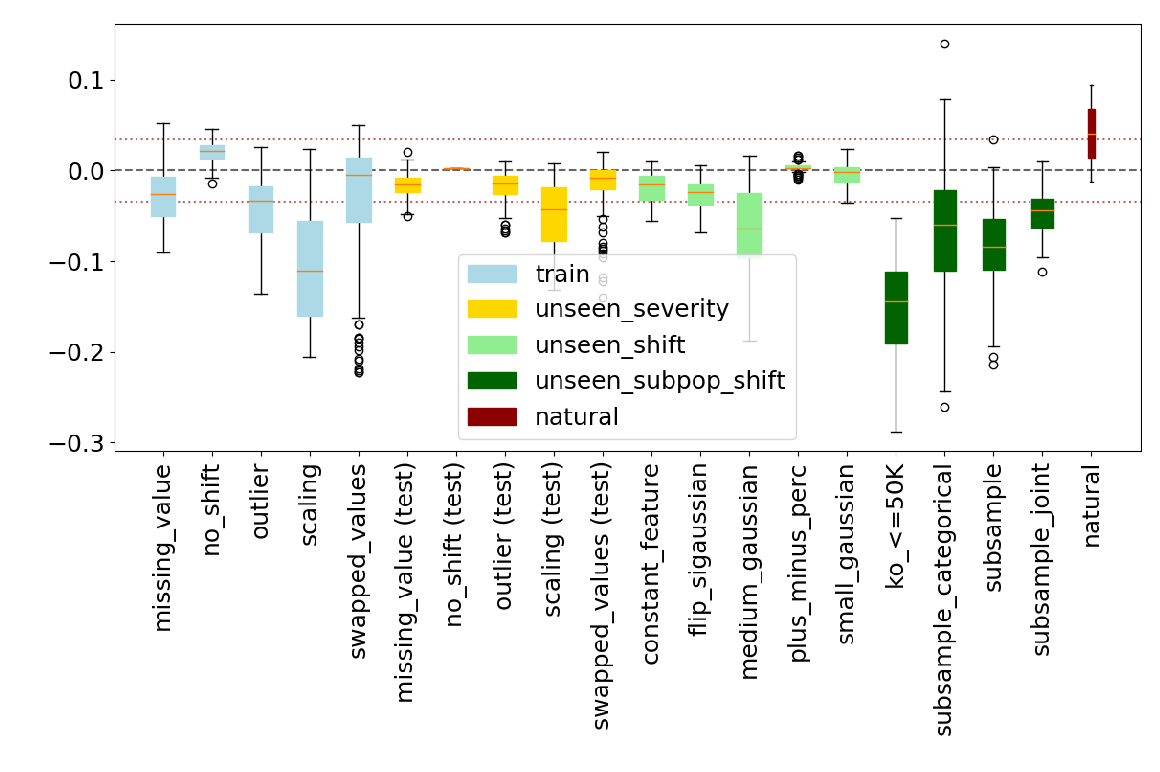

---- adult - paper2


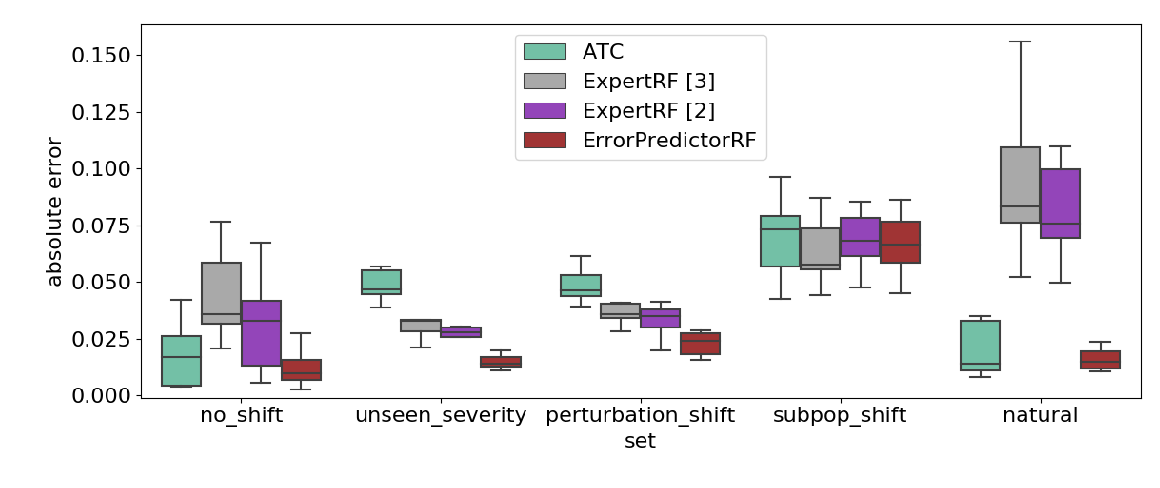

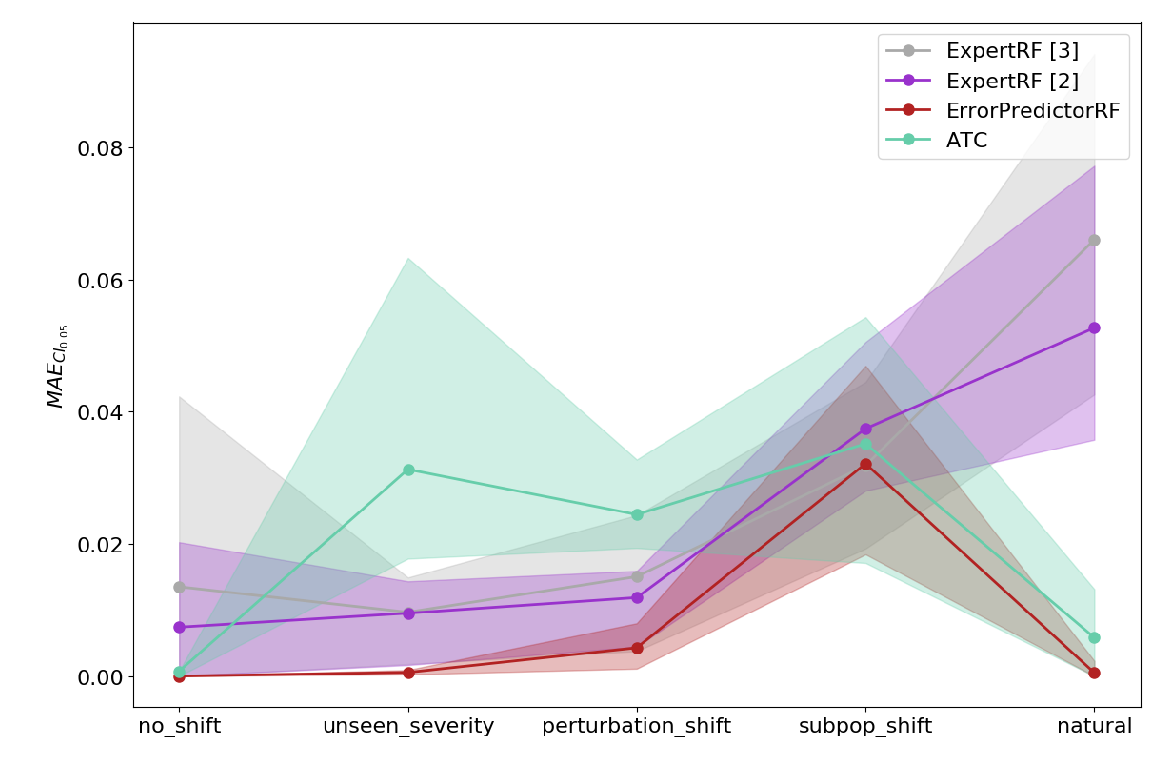

---- adult - errpred


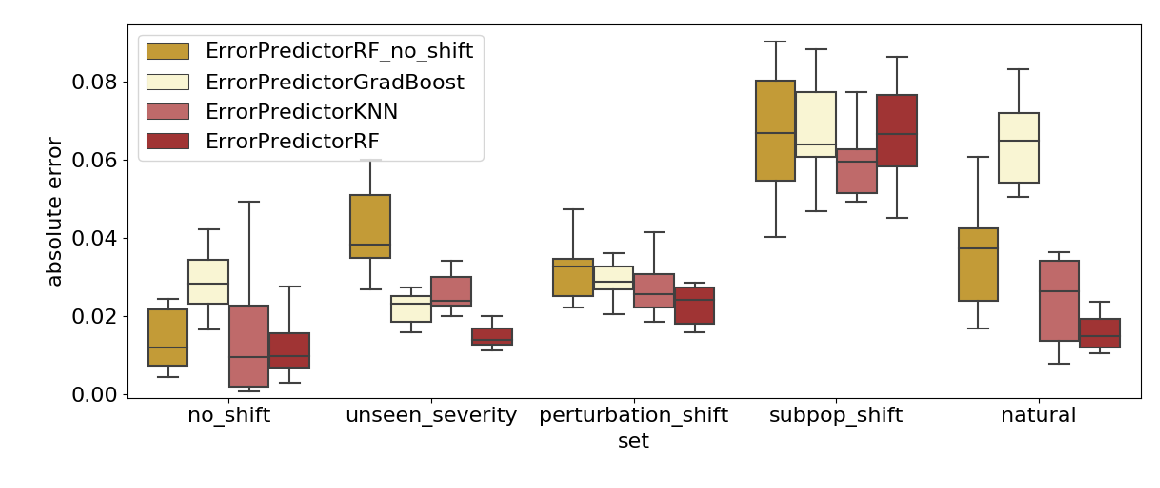

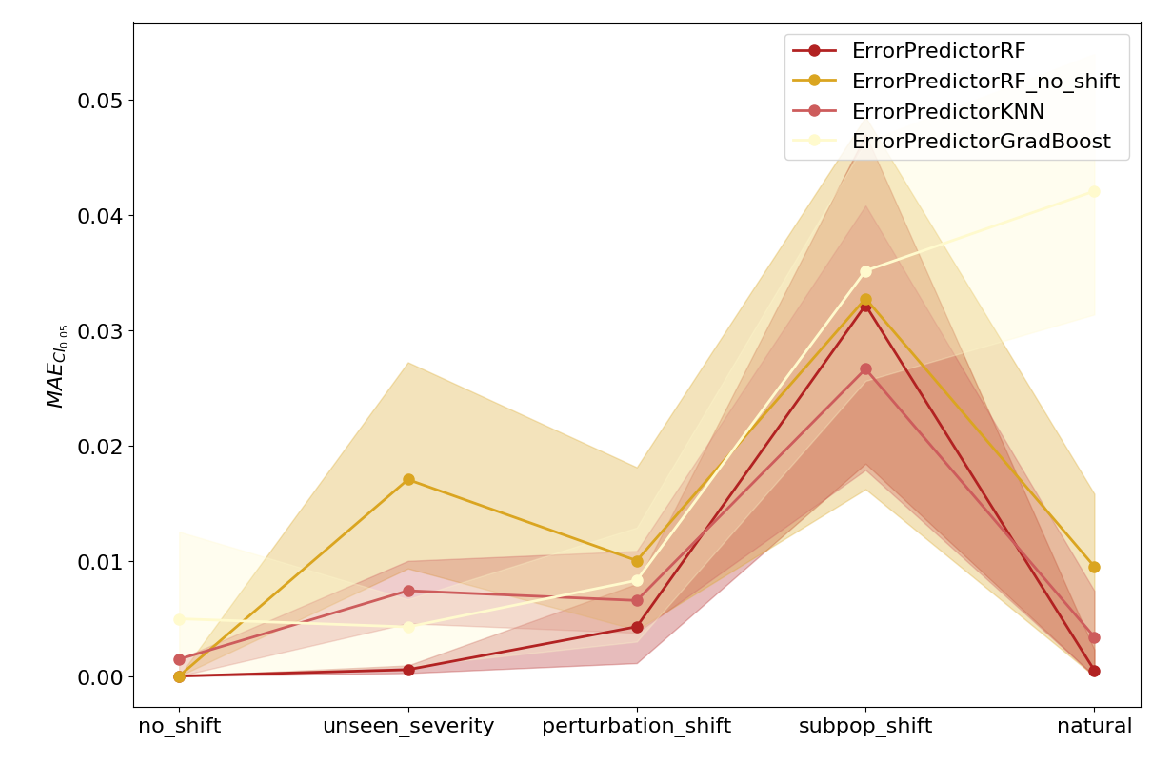

VIDEO_GAMES


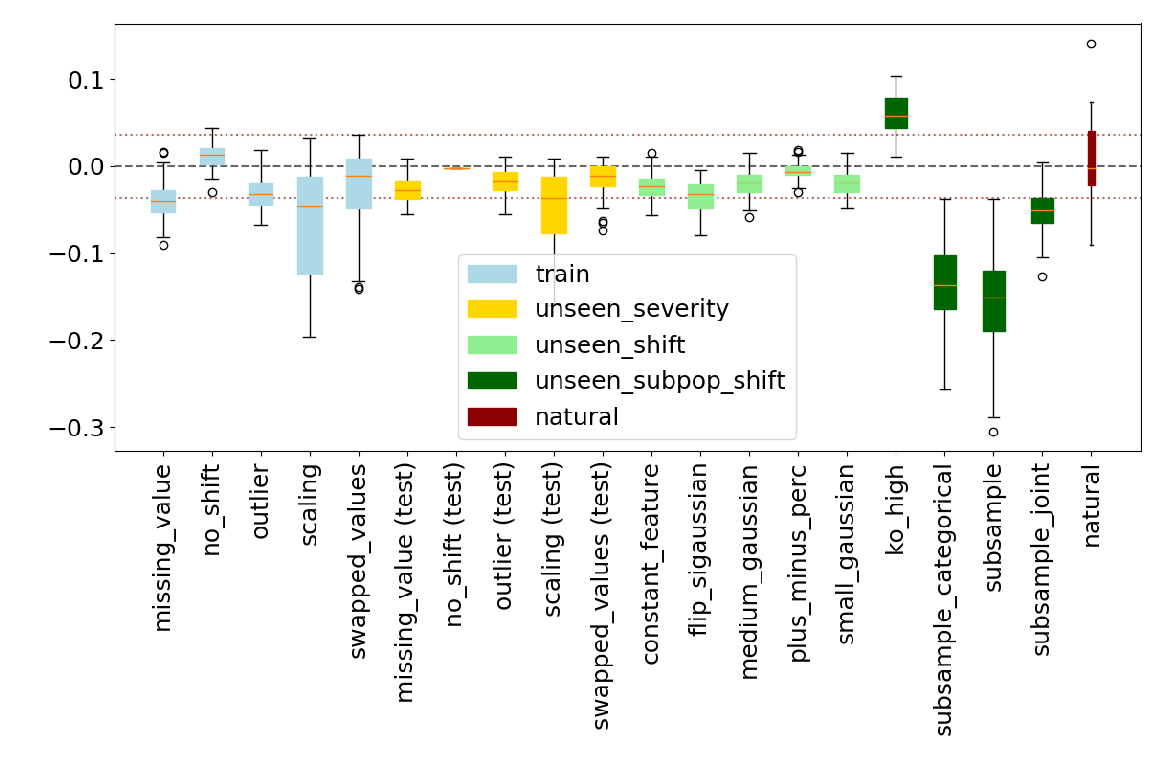

---- video_games - paper2


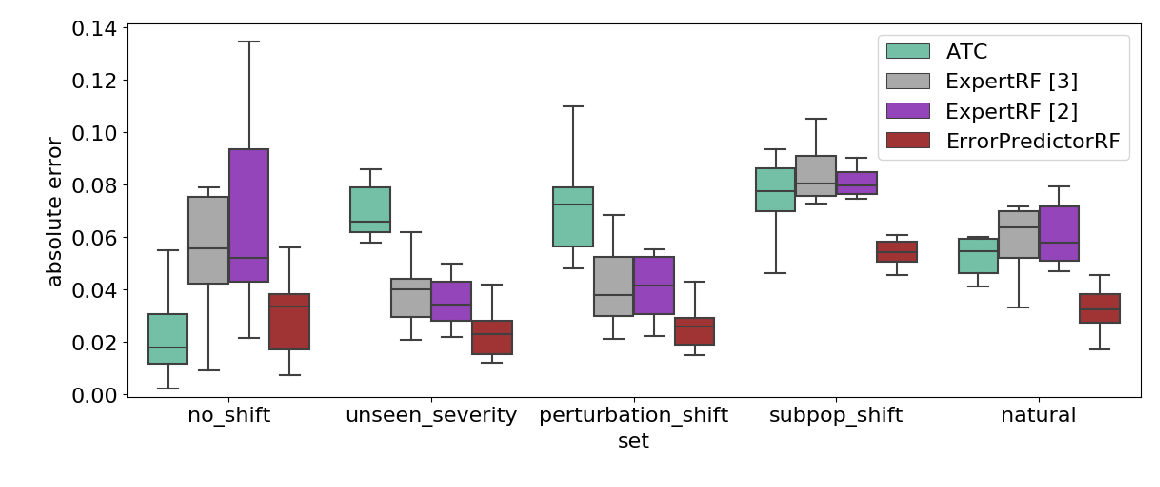

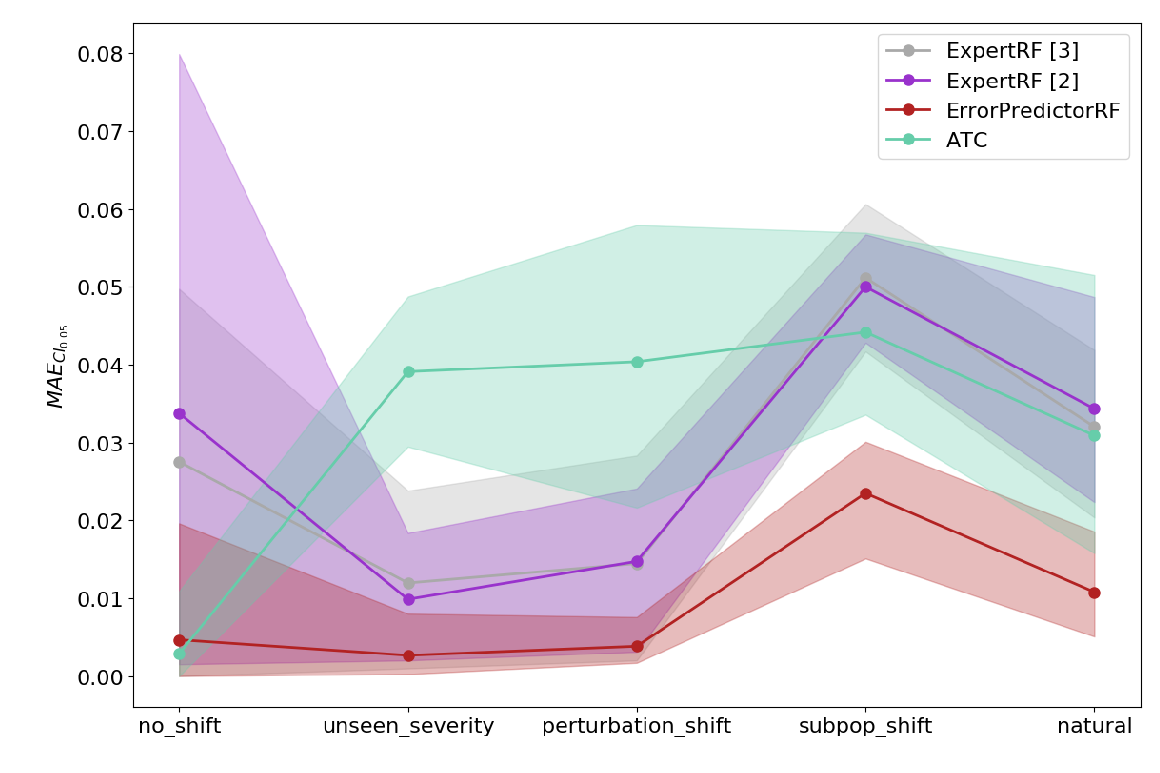

---- video_games - errpred


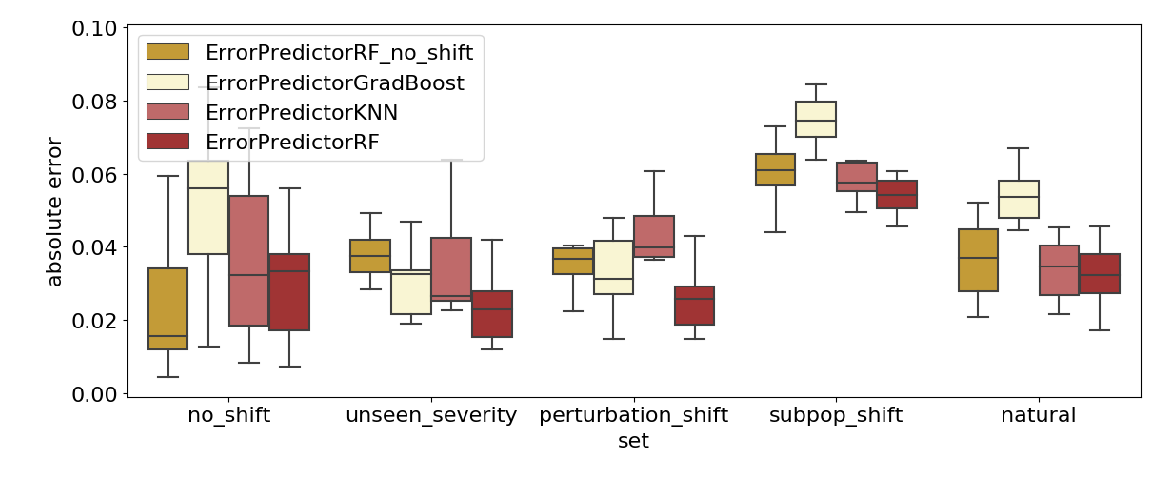

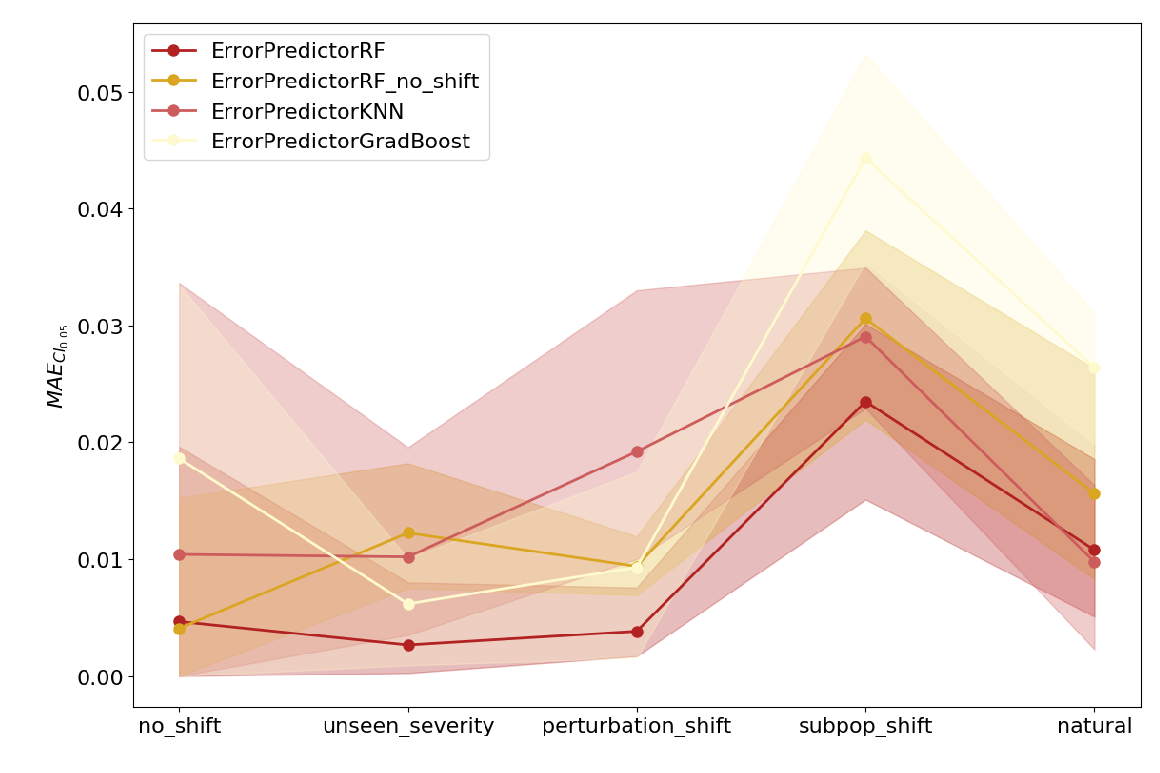

HEART


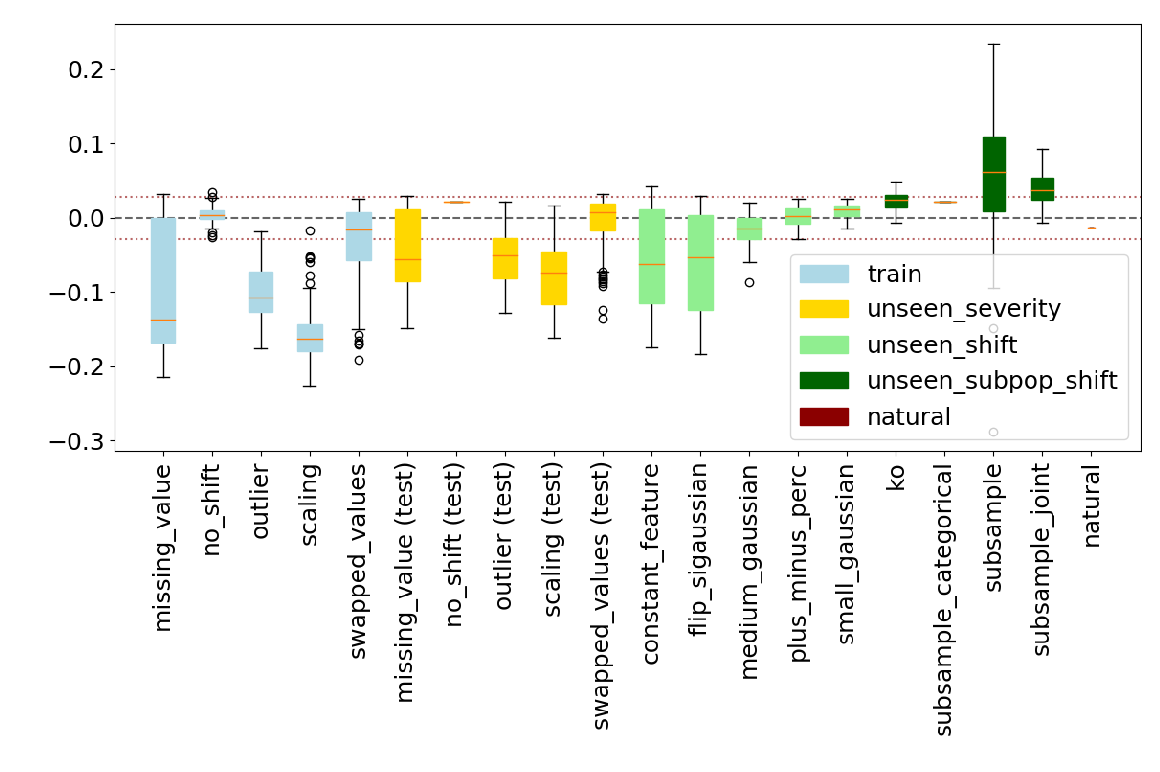

---- heart - paper2


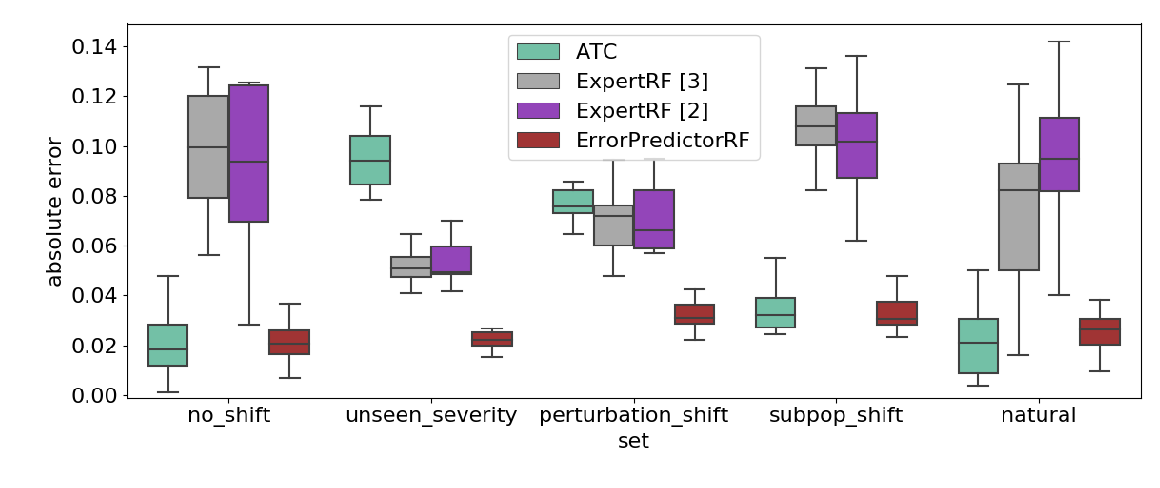

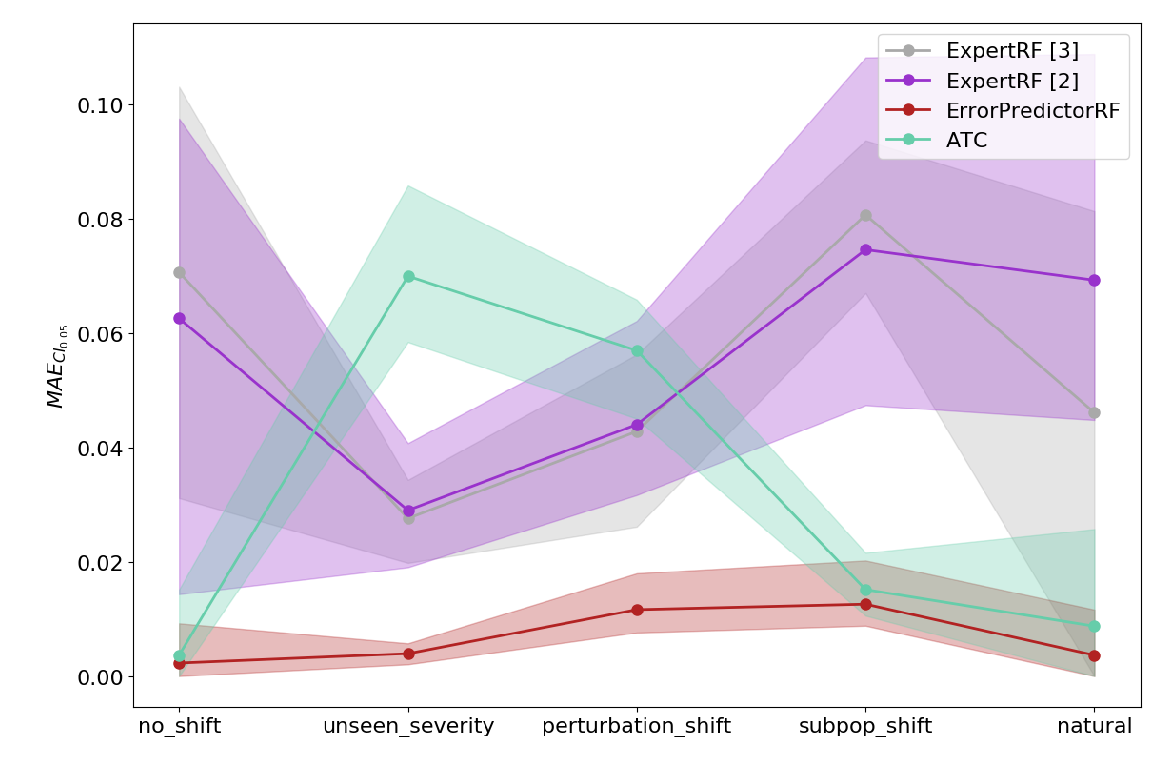

---- heart - errpred


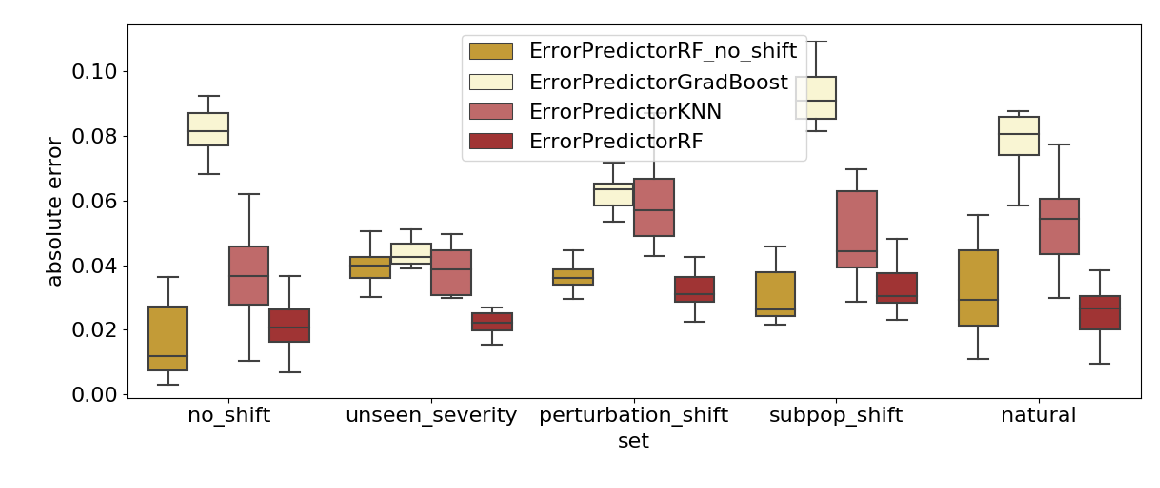

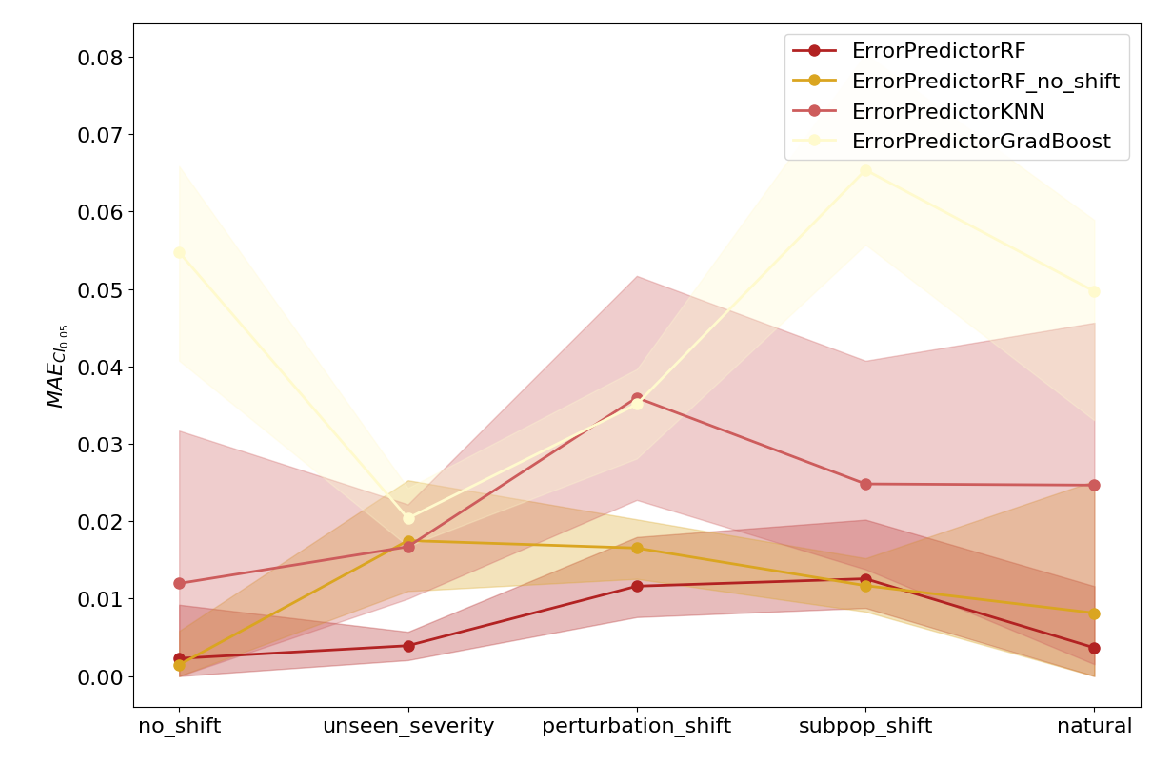

BANK


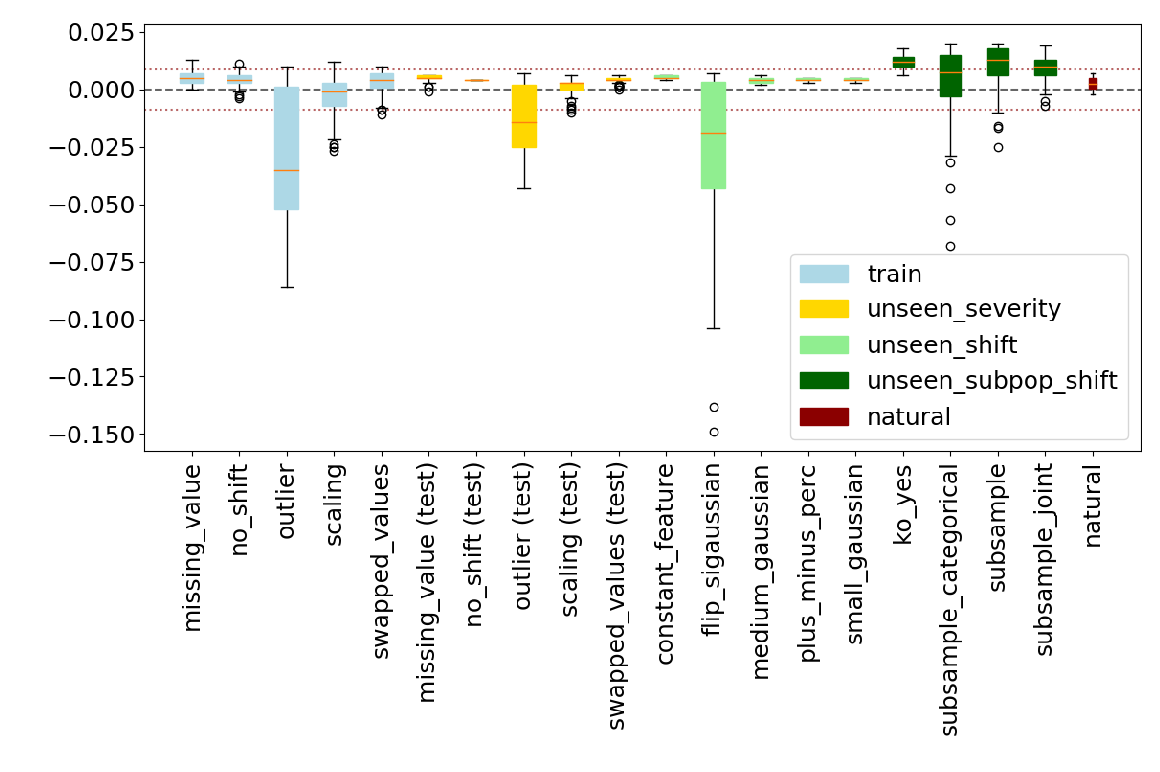

---- bank - paper2


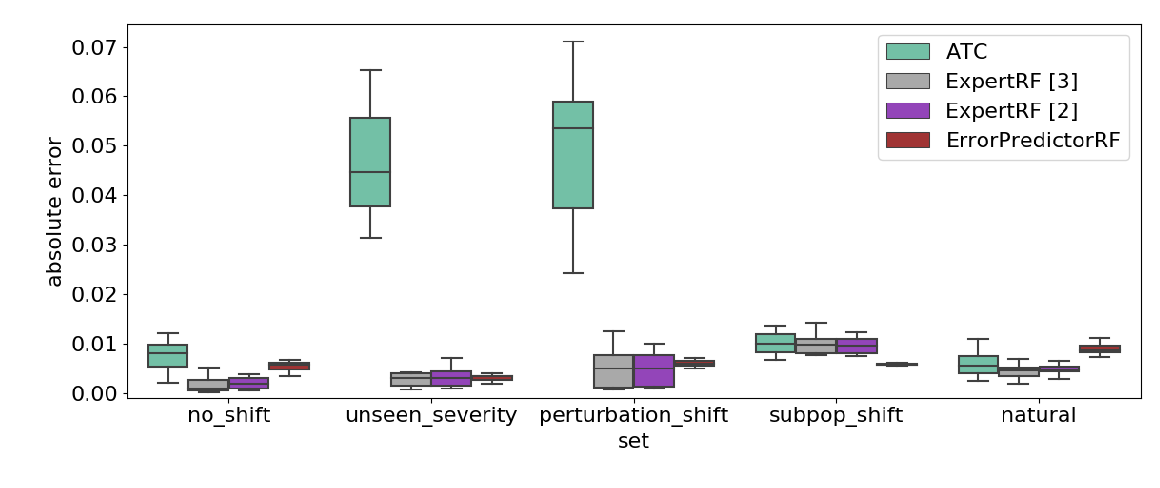

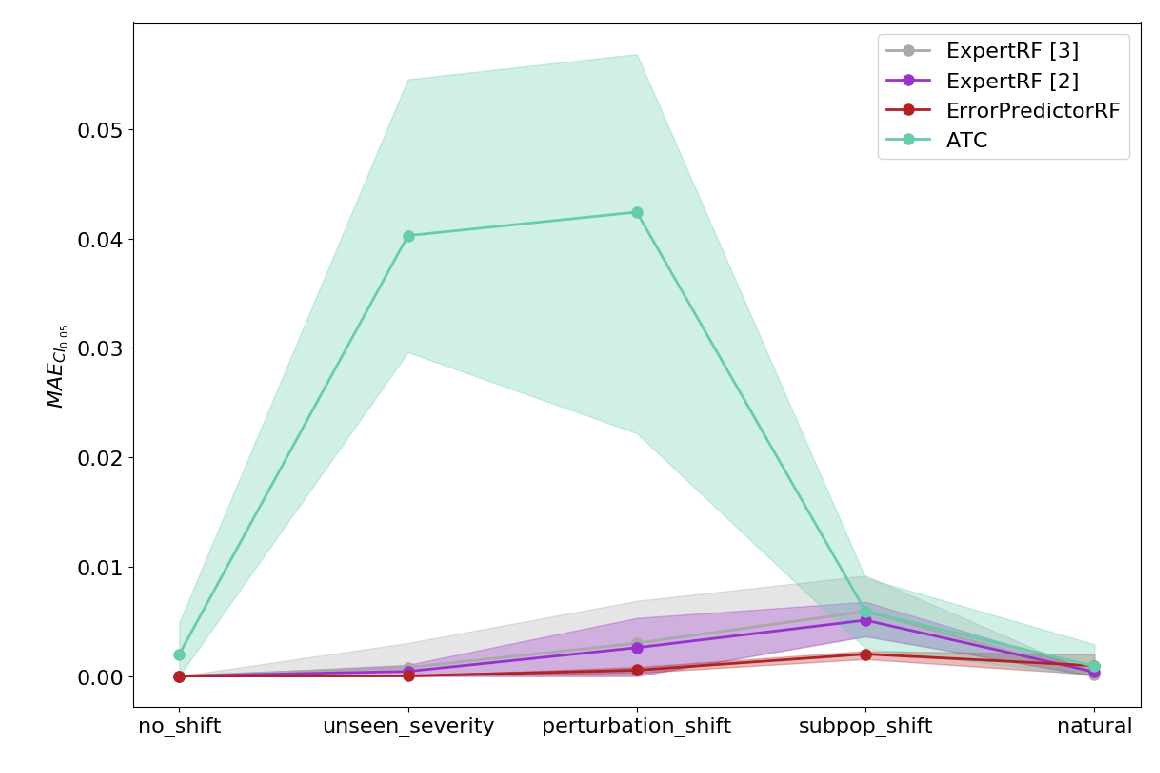

---- bank - errpred


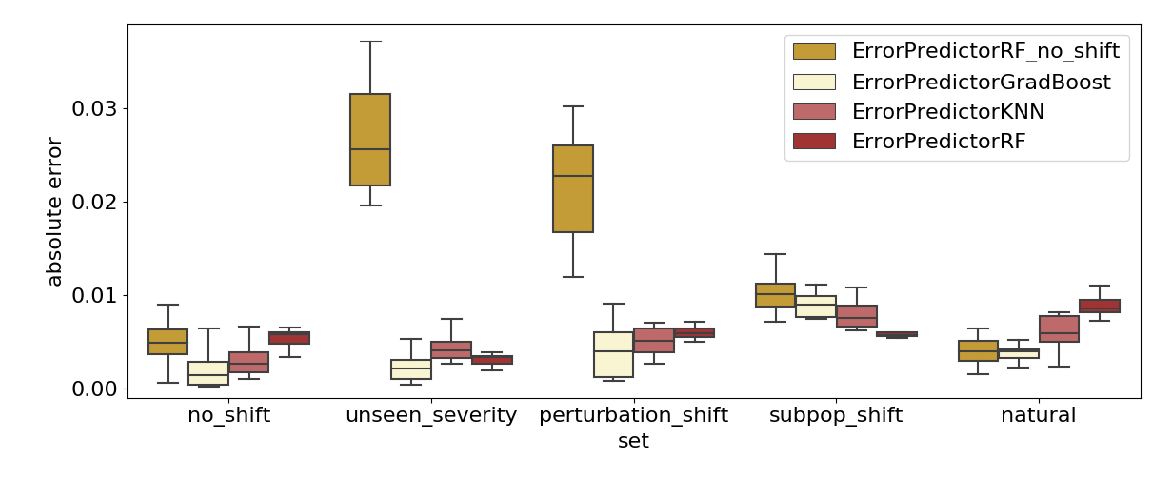

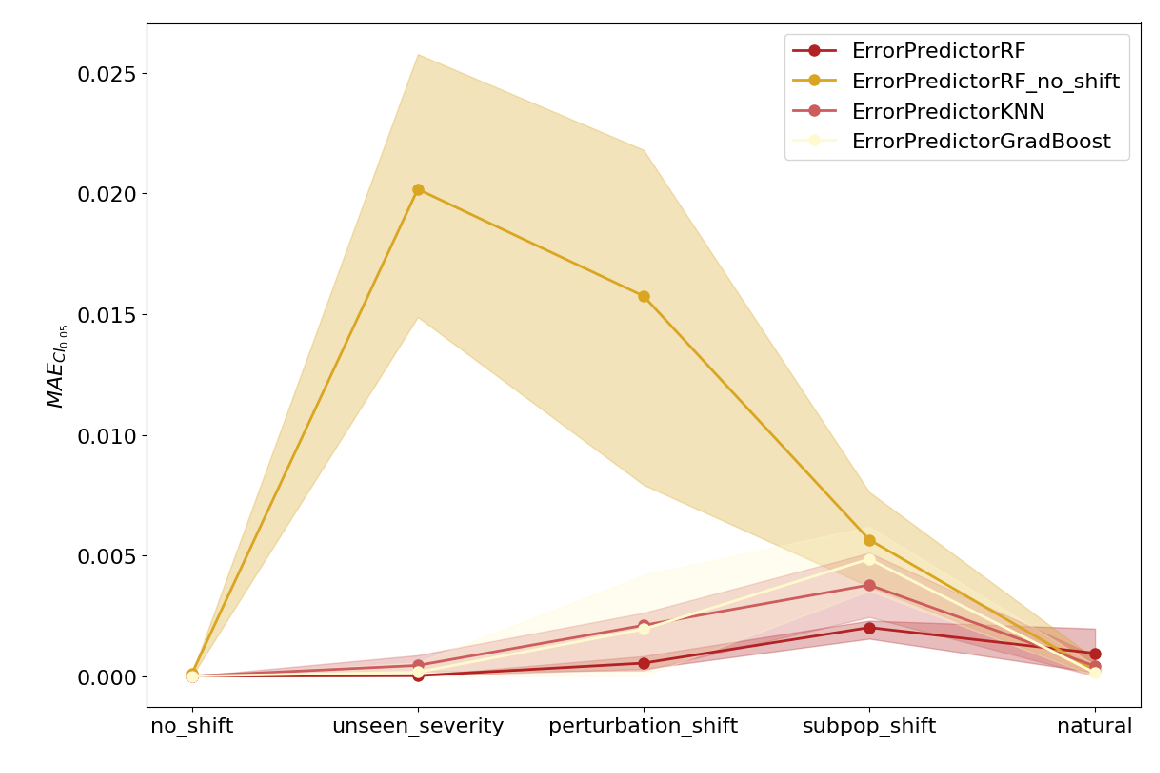

BNG_ZOO


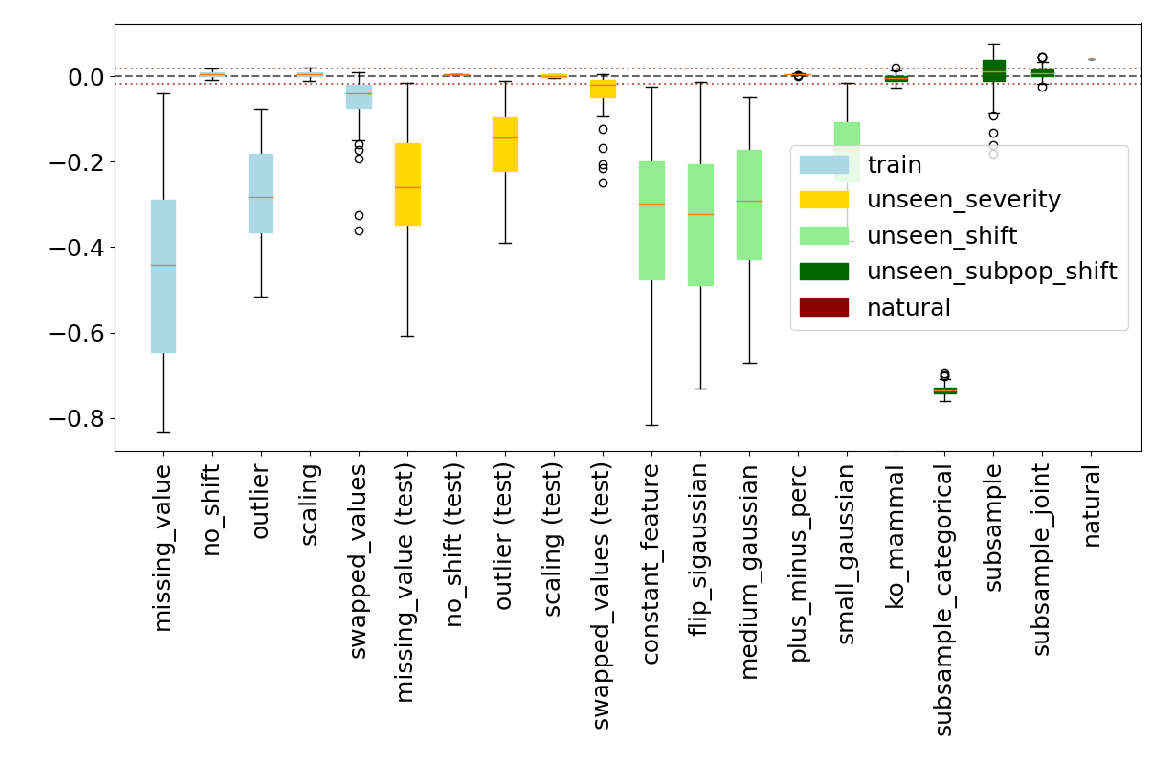

---- bng_zoo - paper2


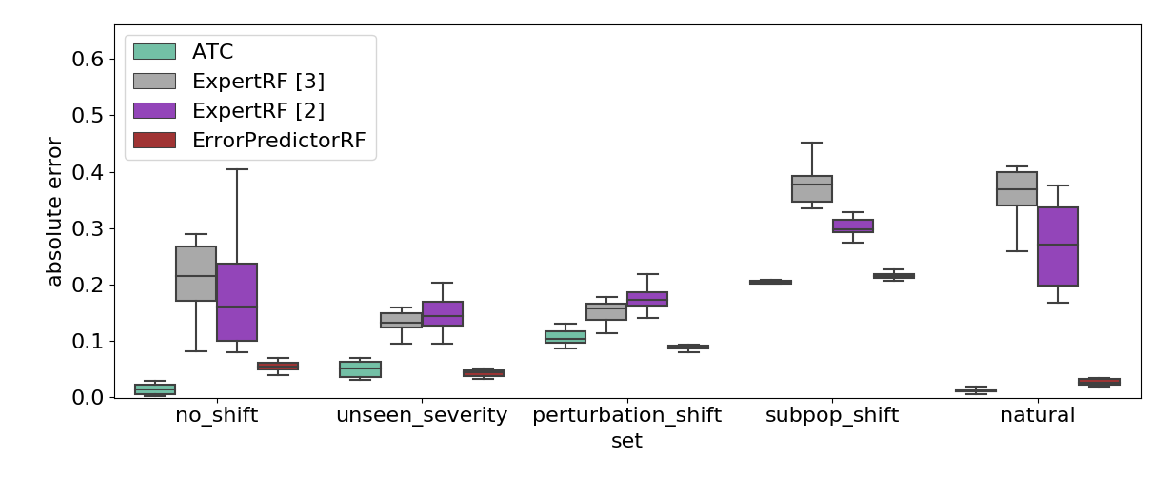

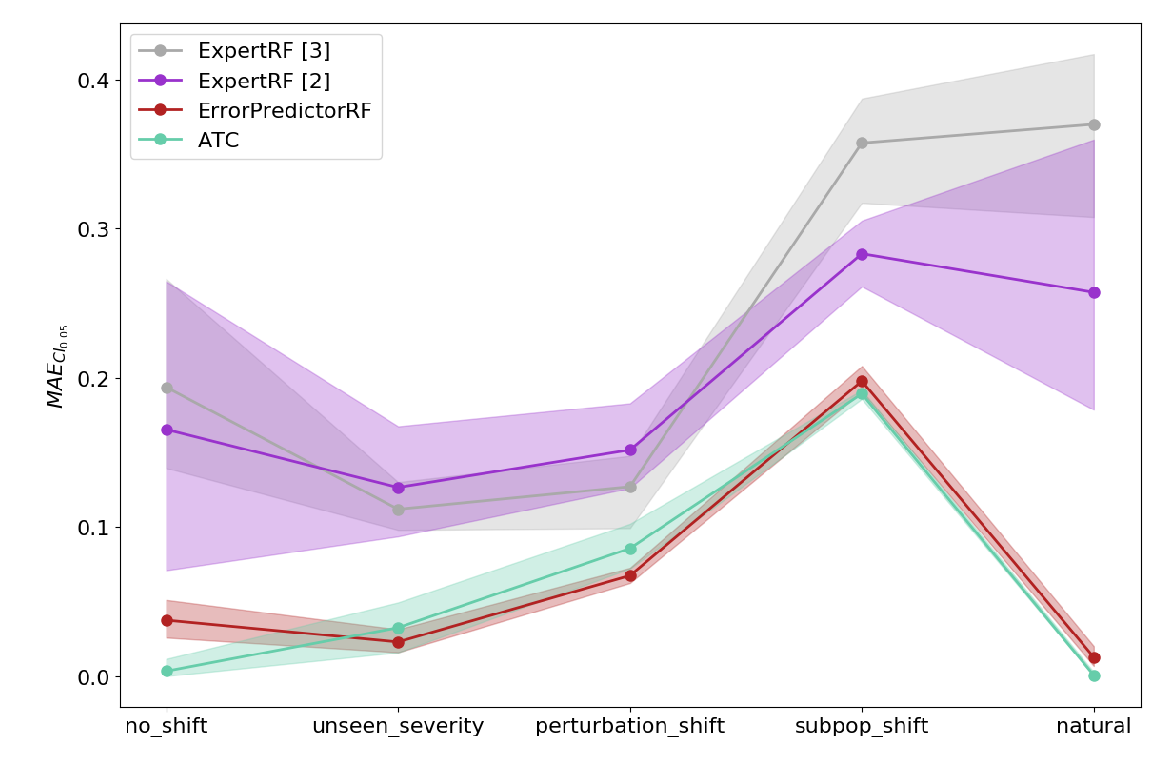

---- bng_zoo - errpred


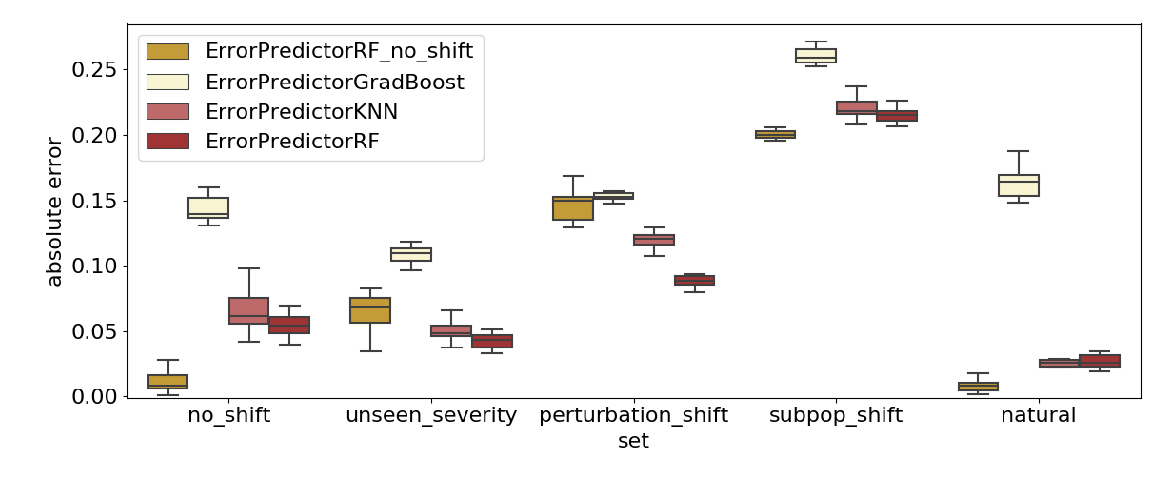

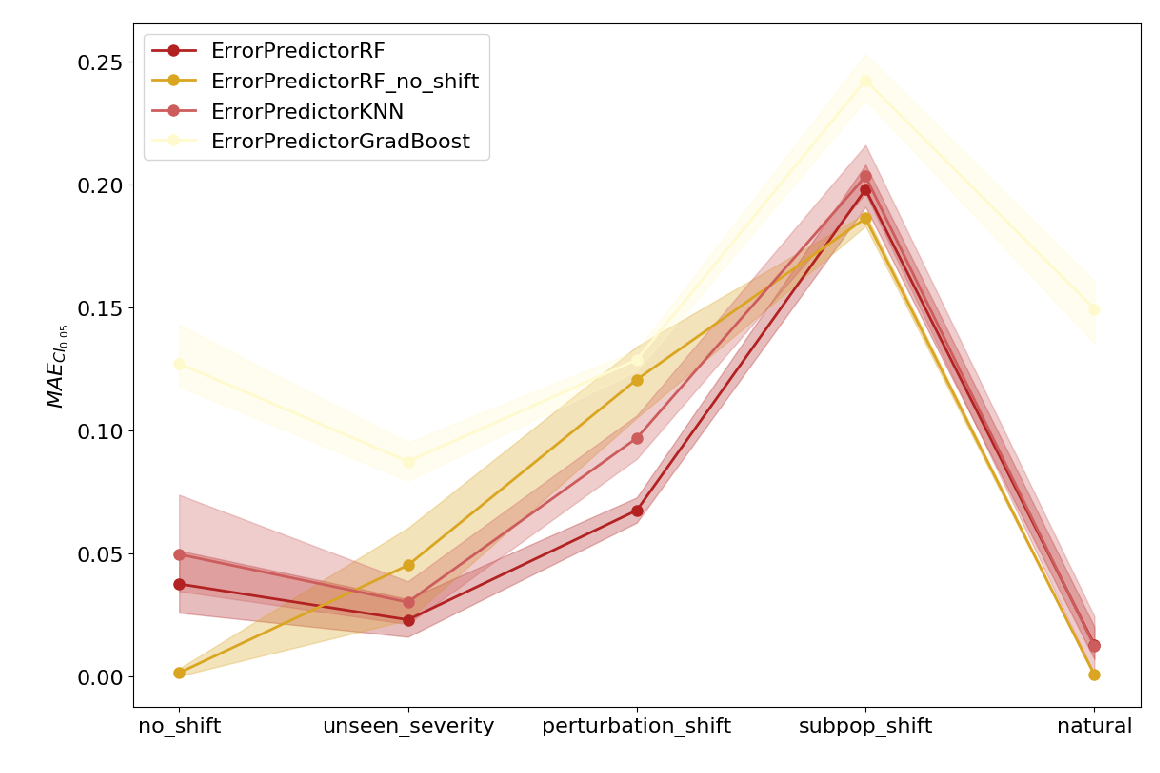

JSBACH_CHORALS_MODIFIED


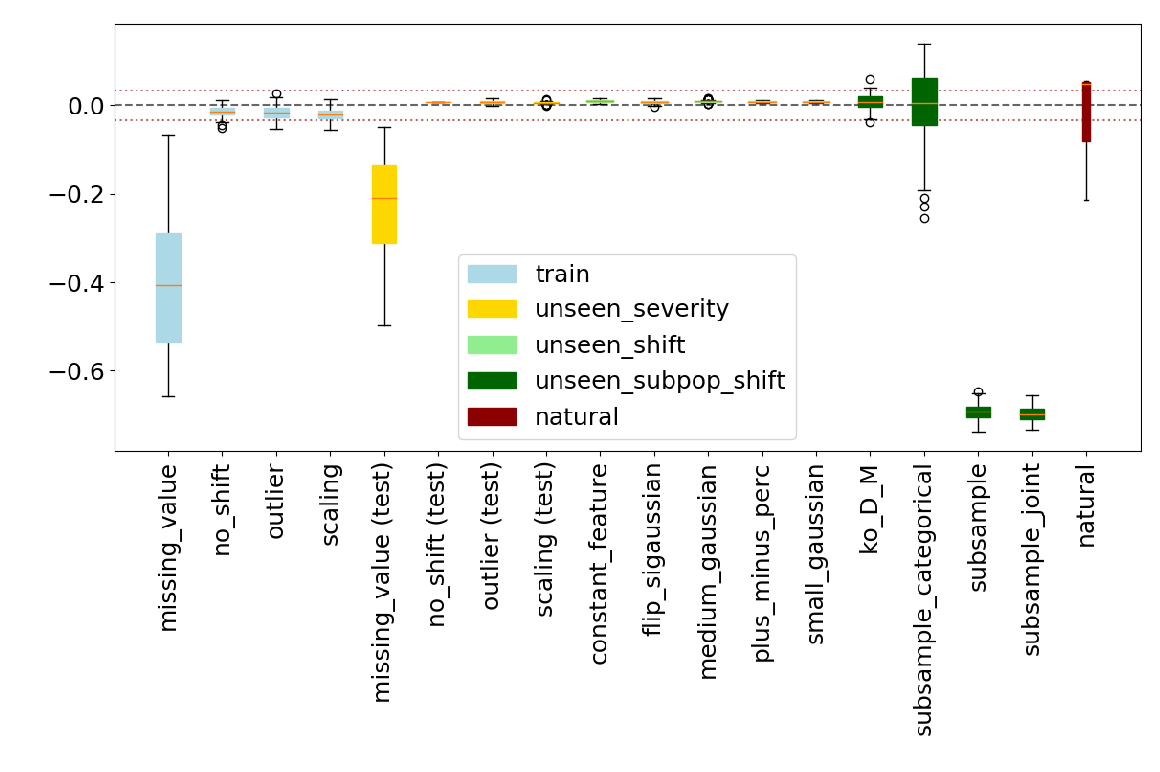

---- jsbach_chorals_modified - paper2


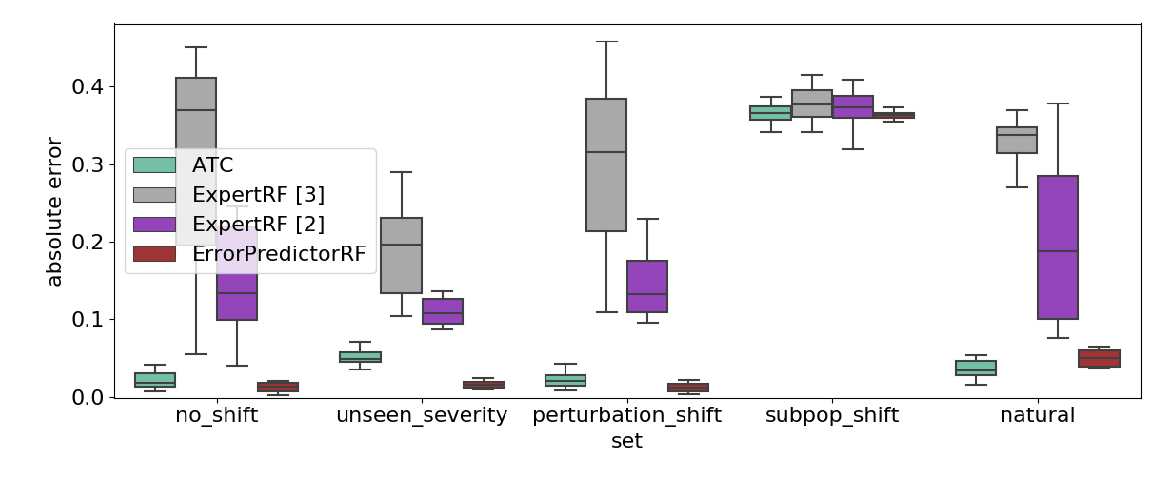

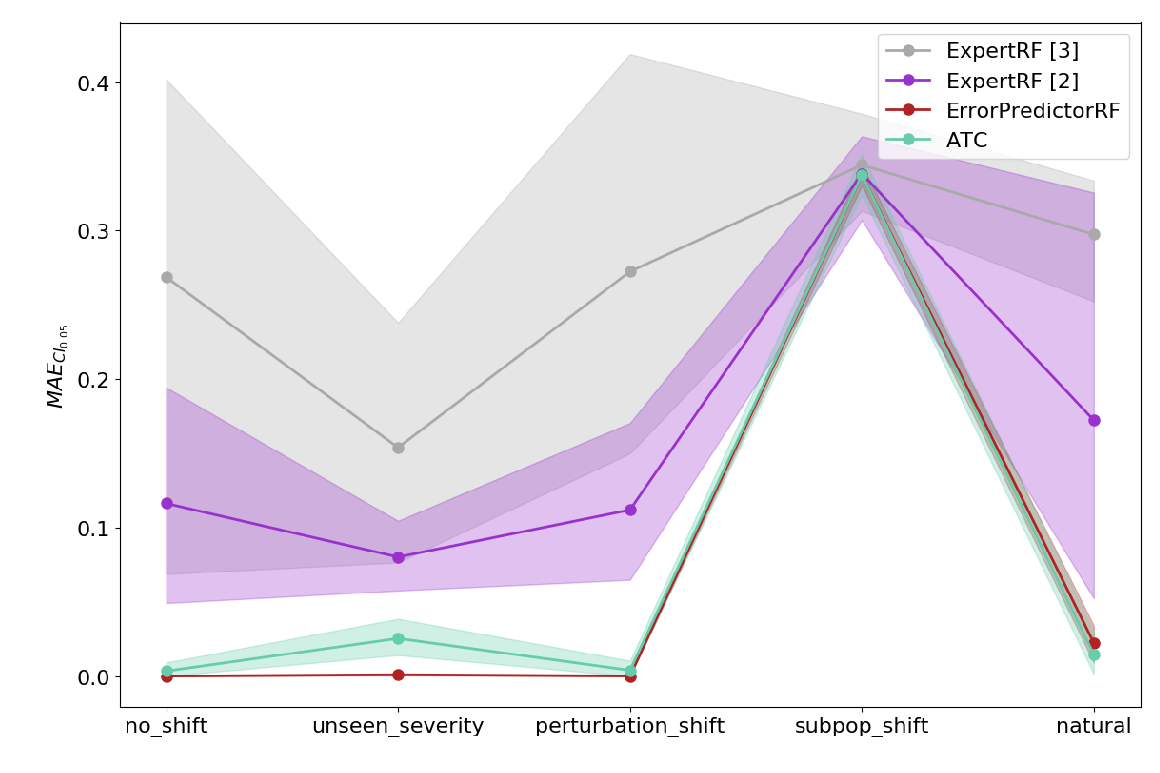

---- jsbach_chorals_modified - errpred


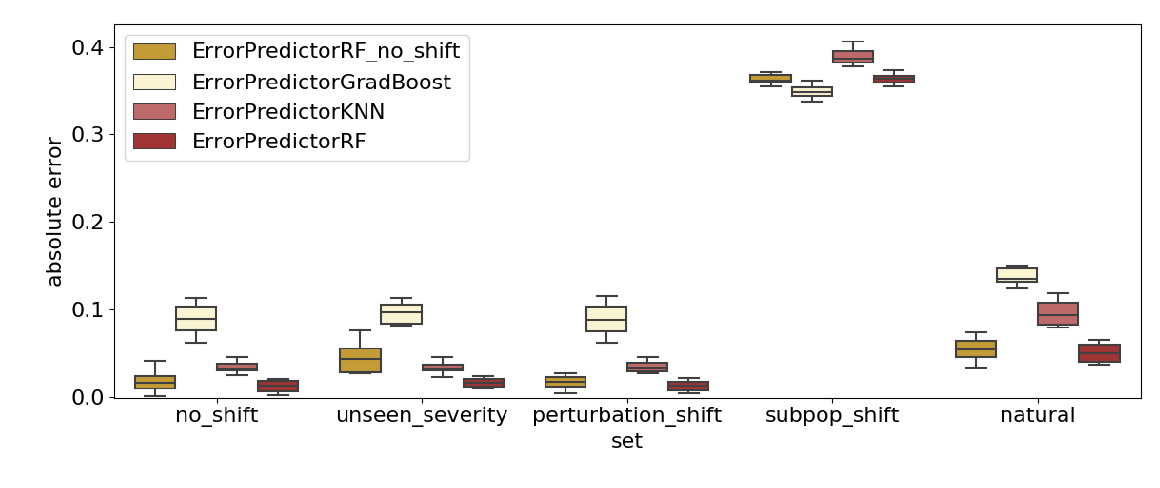

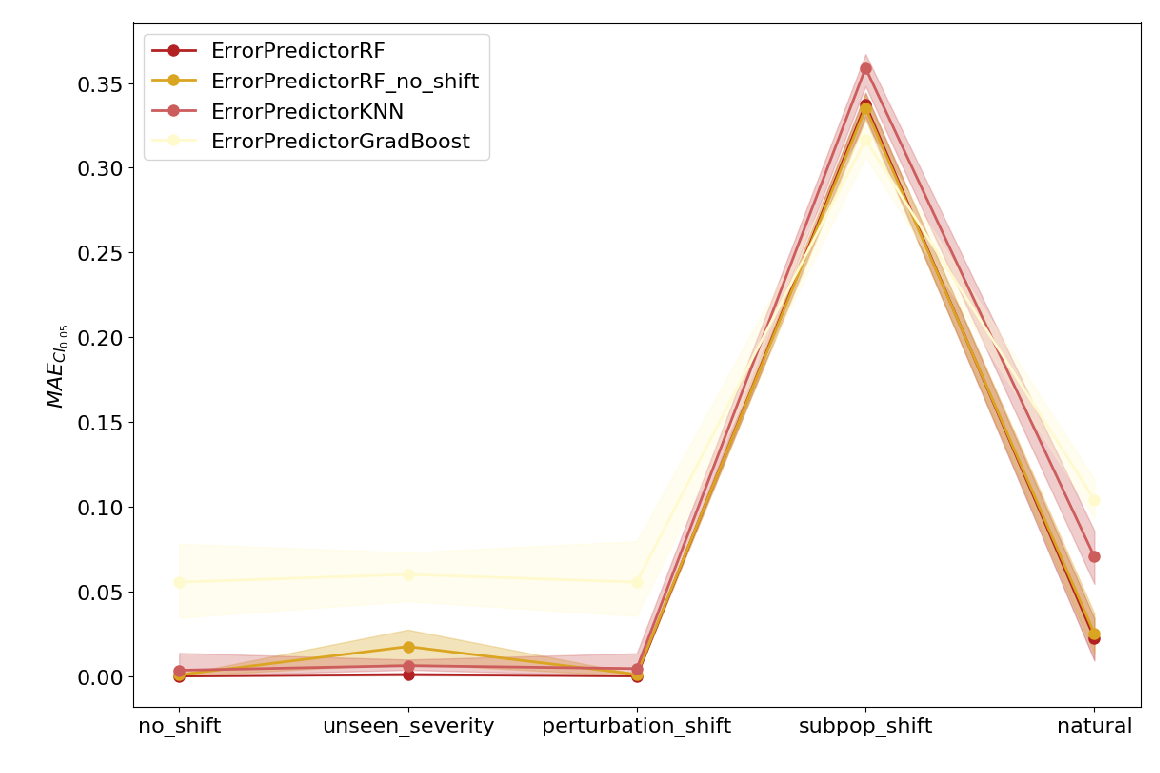

SDSS


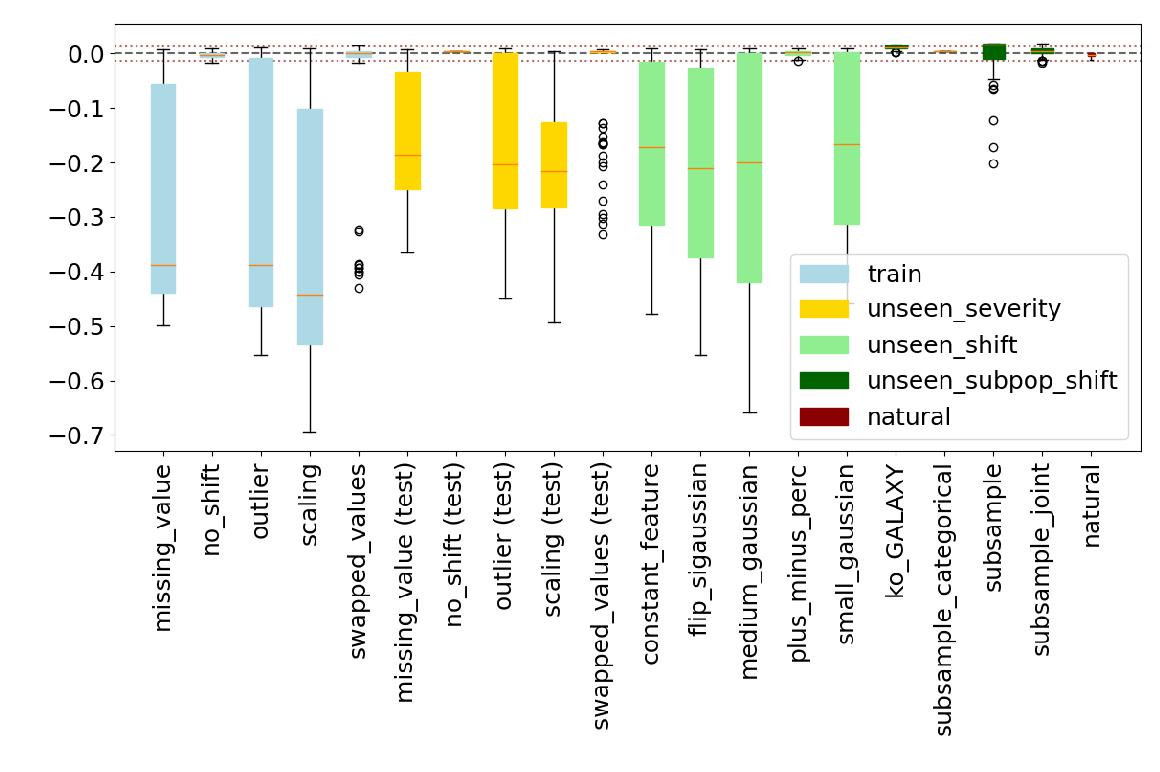

---- SDSS - paper2


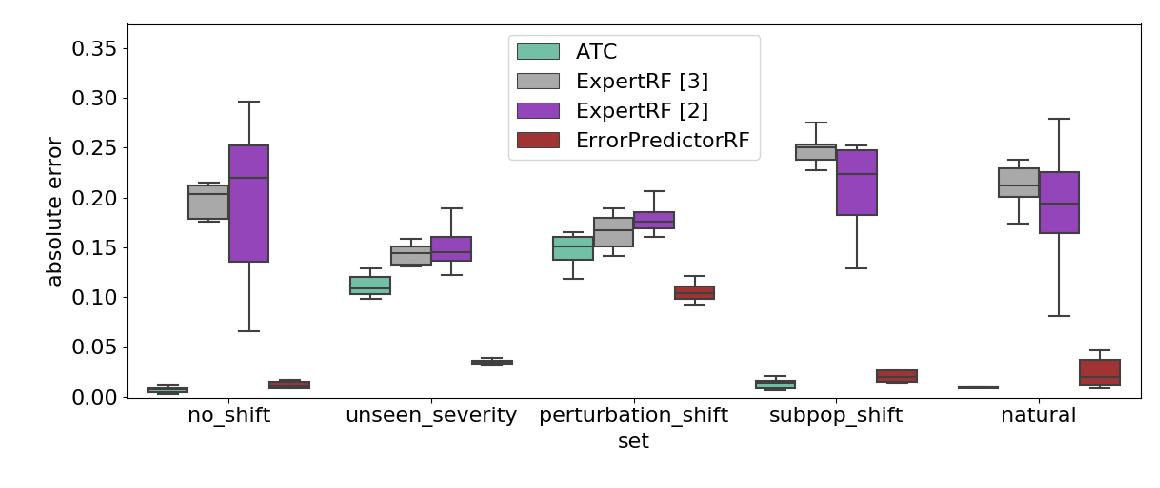

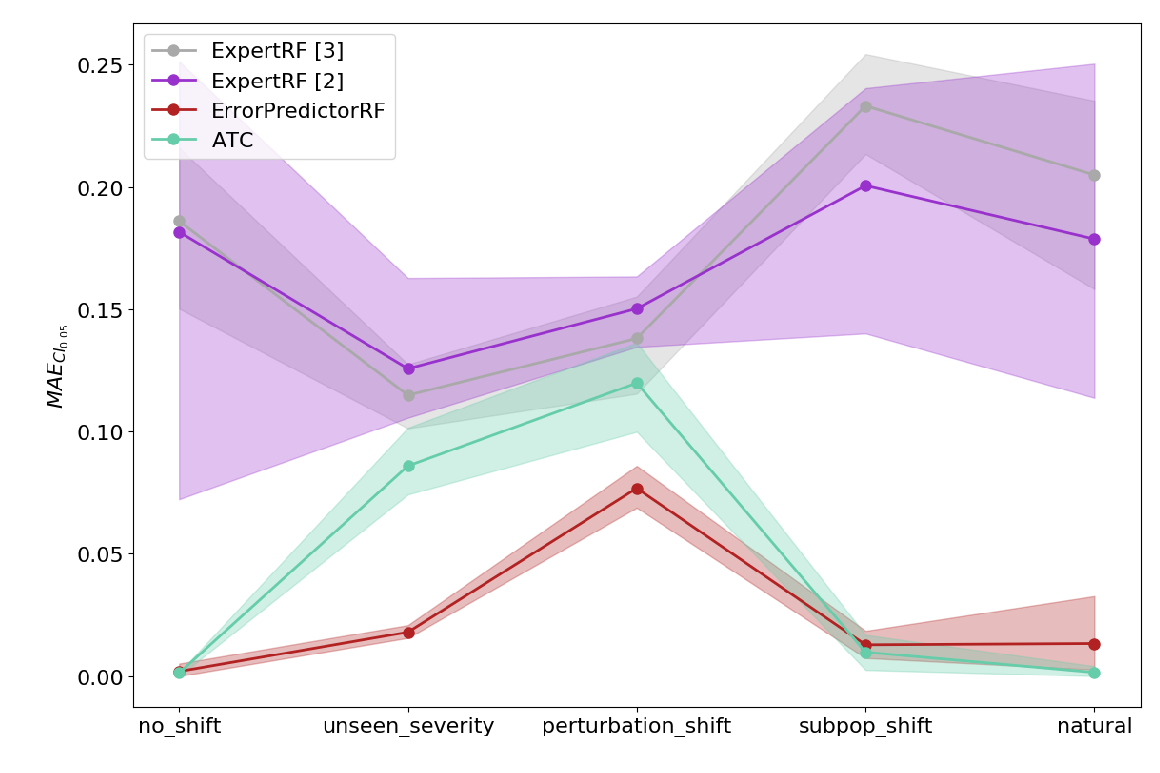

---- SDSS - errpred


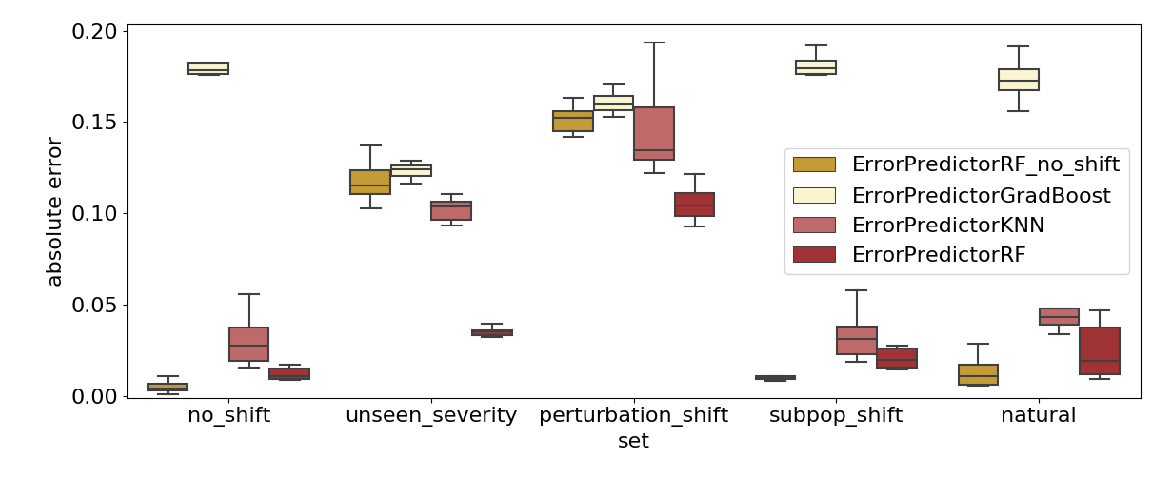

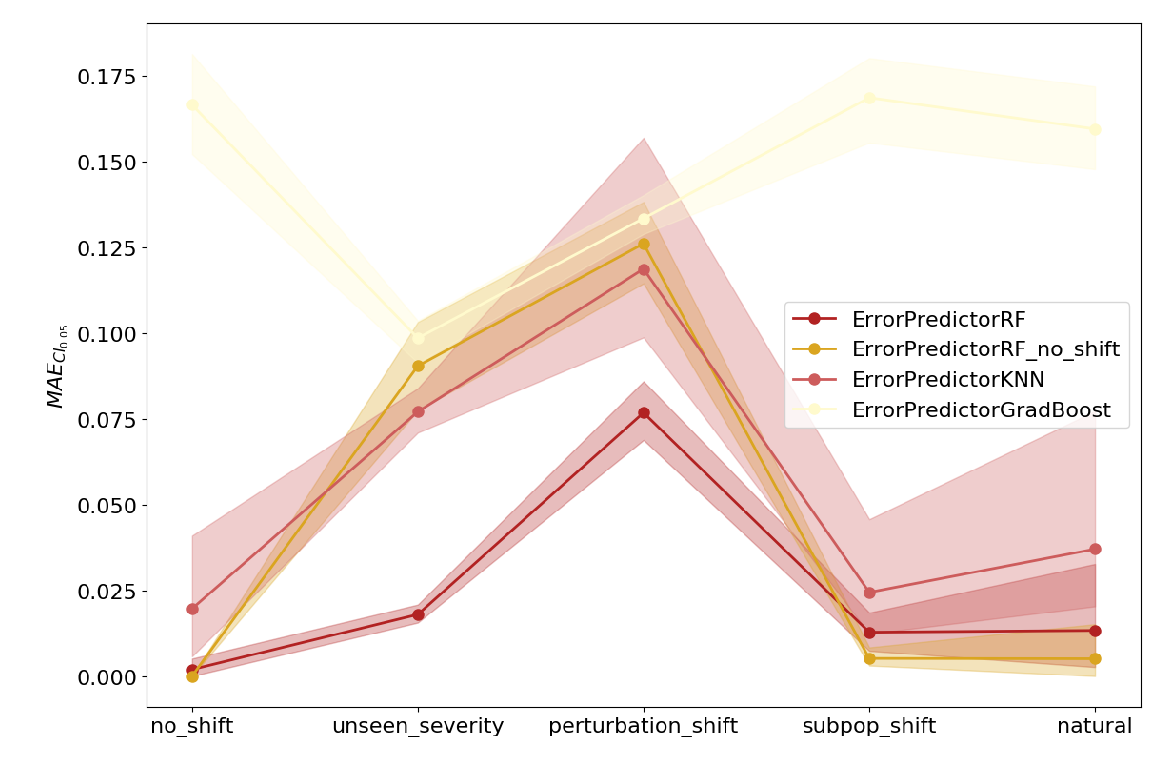

BNG_IONOSPHERE


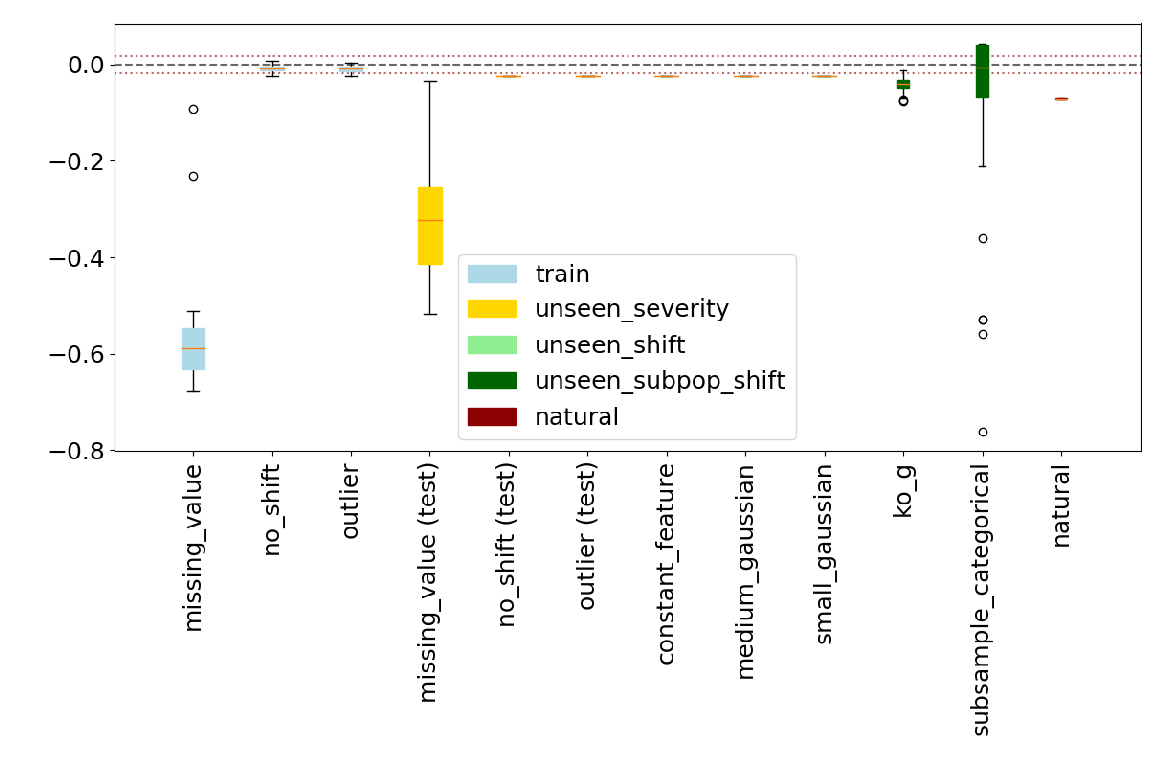

---- bng_ionosphere - paper2


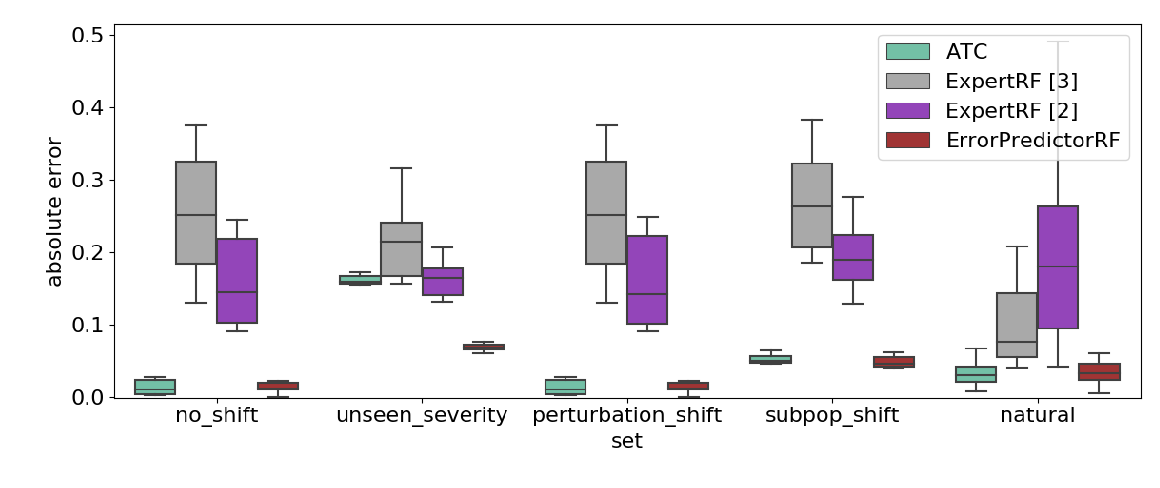

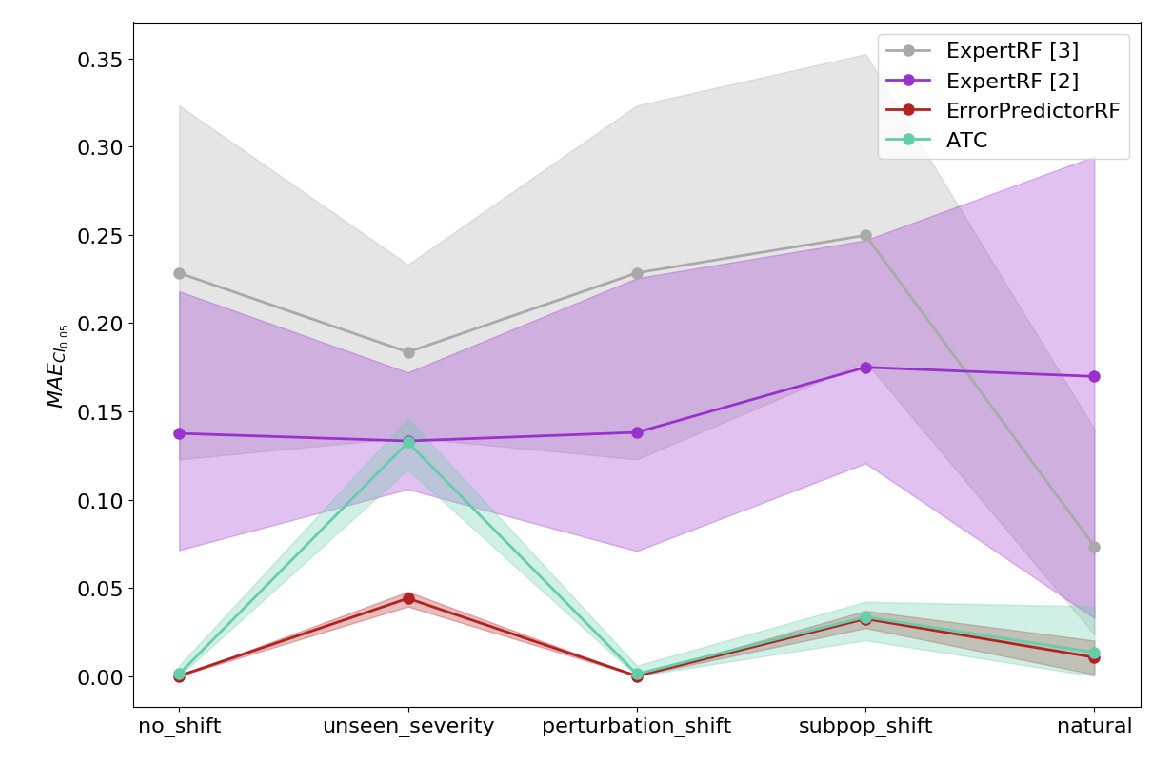

---- bng_ionosphere - errpred


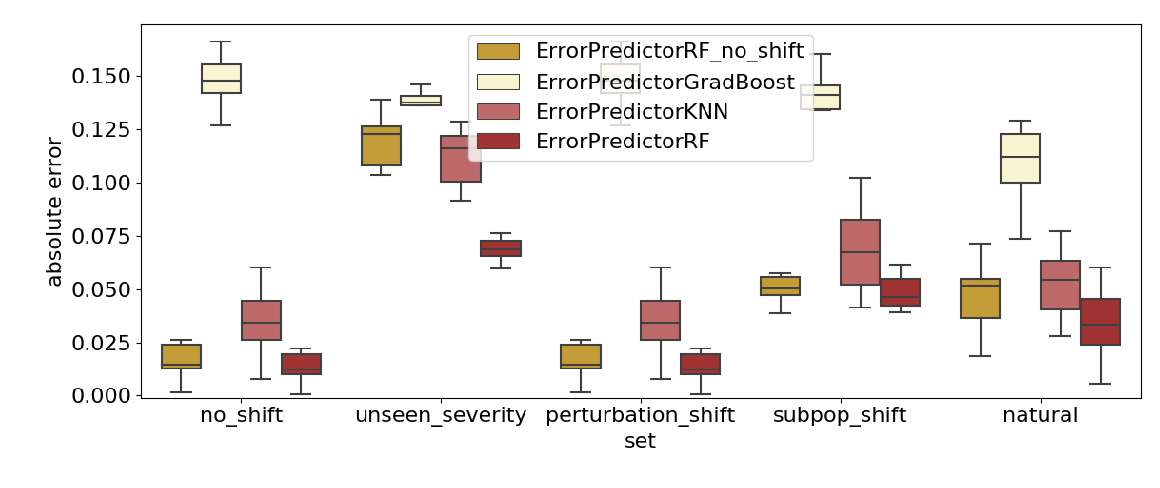

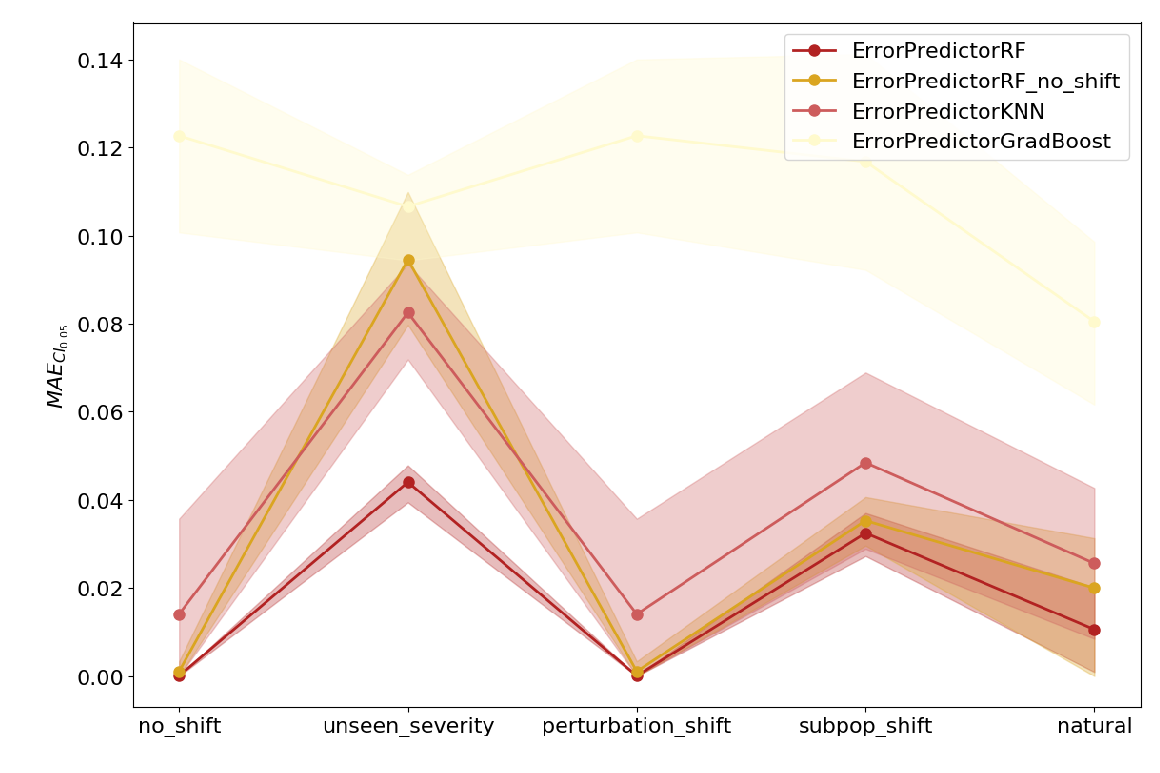

ARTIFICIAL_CHARACTERS


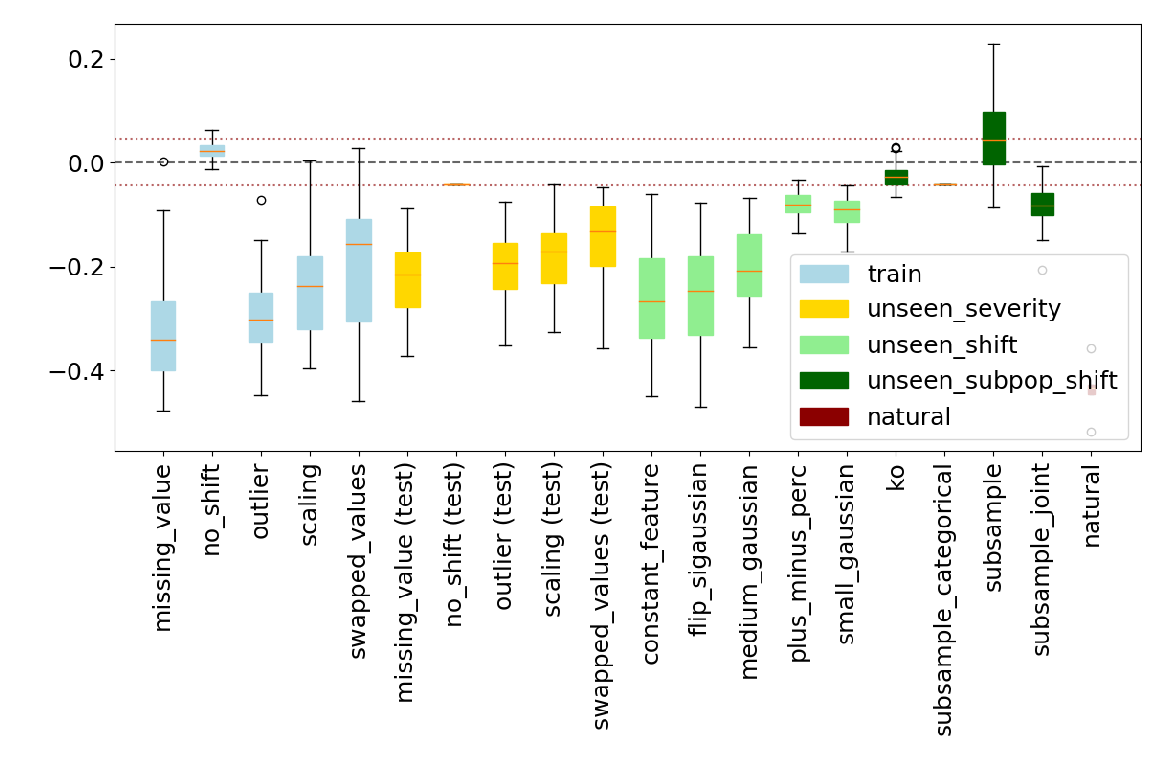

---- artificial_characters - paper2


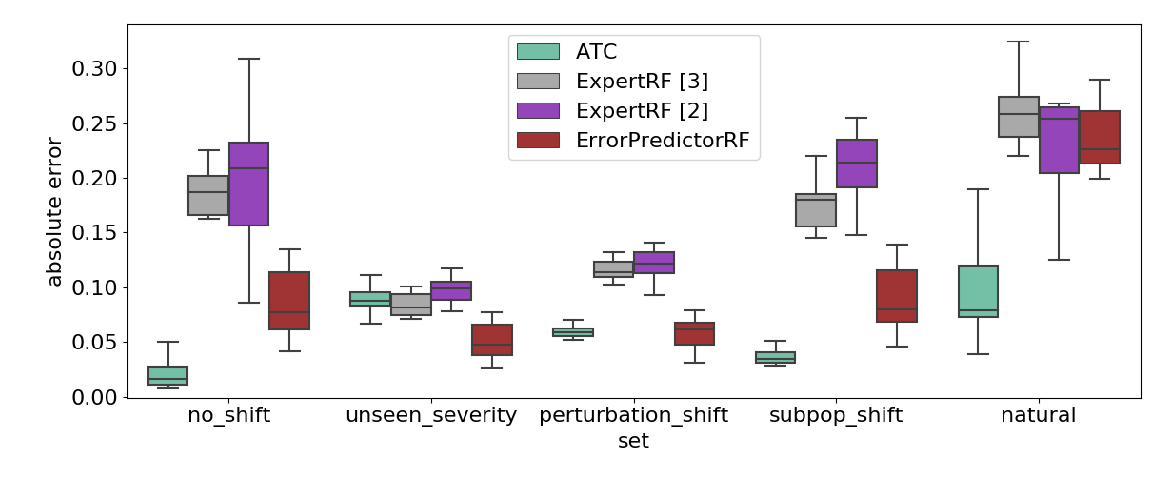

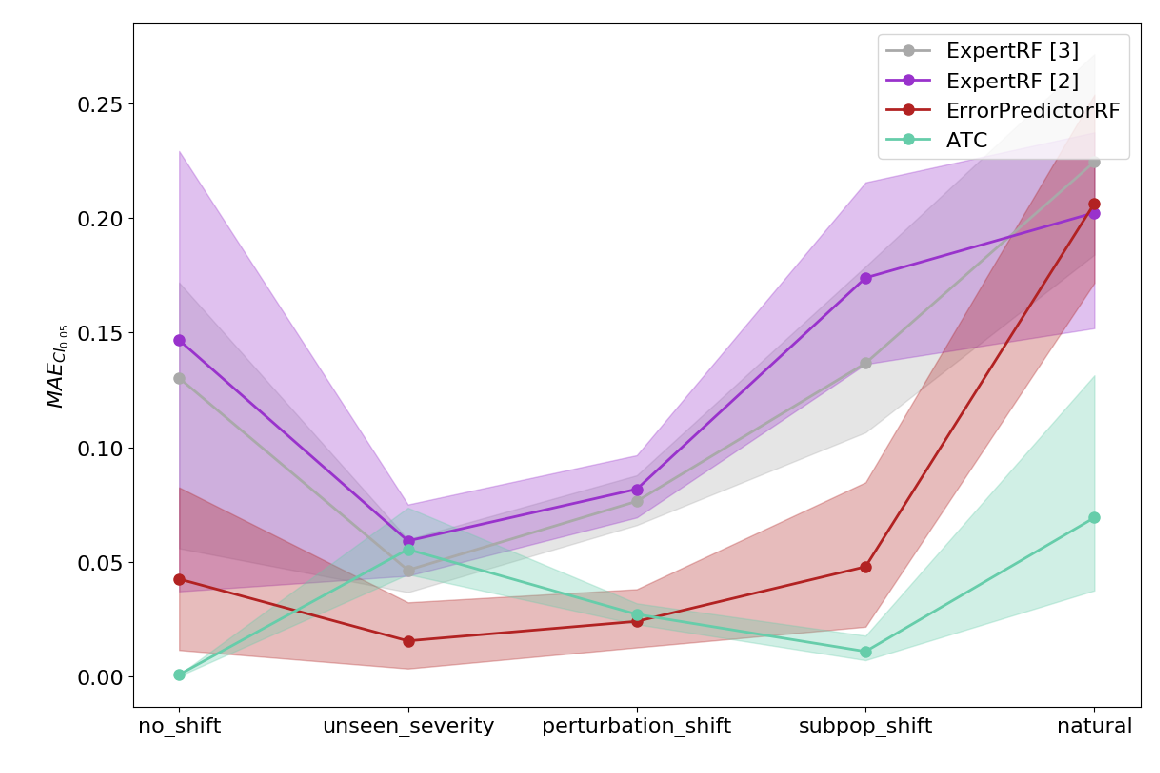

---- artificial_characters - errpred


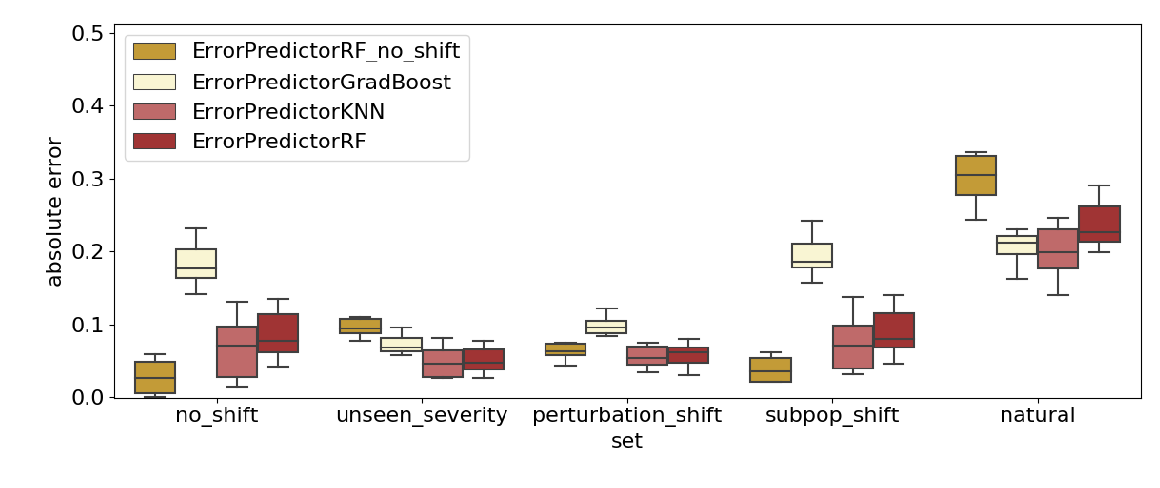

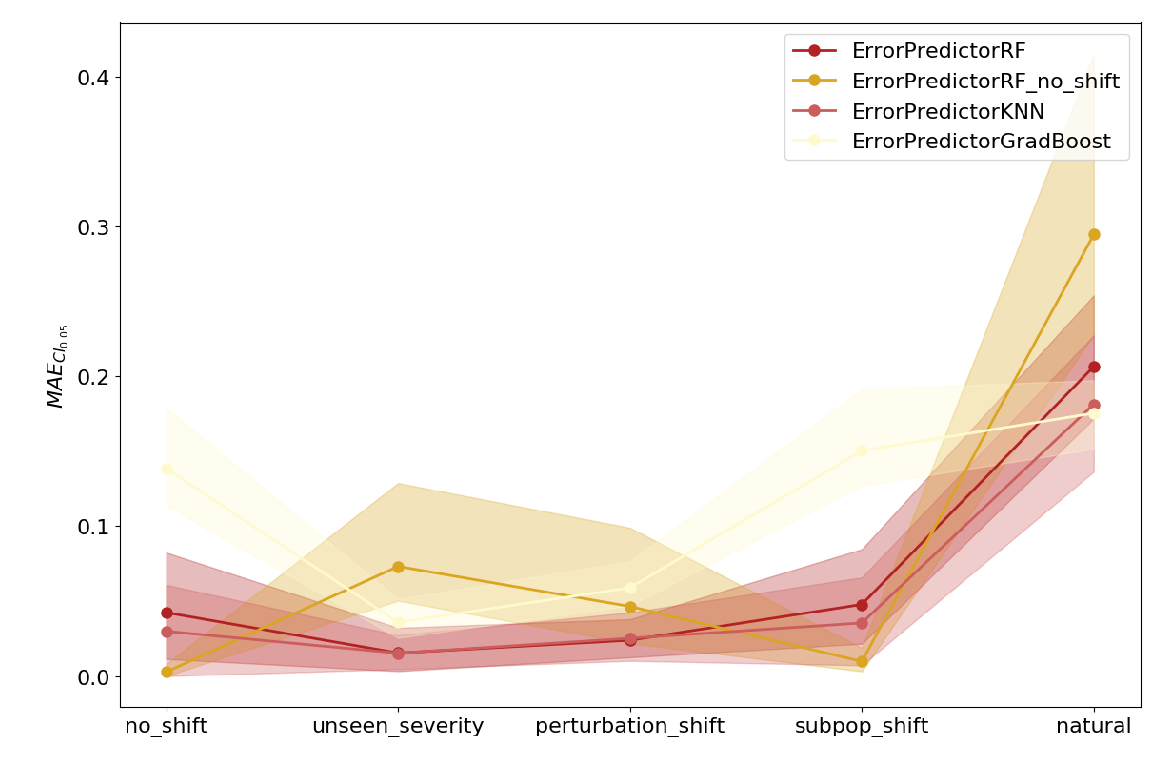

DEFAULT_OF_CREDIT_CARD_CLIENTS


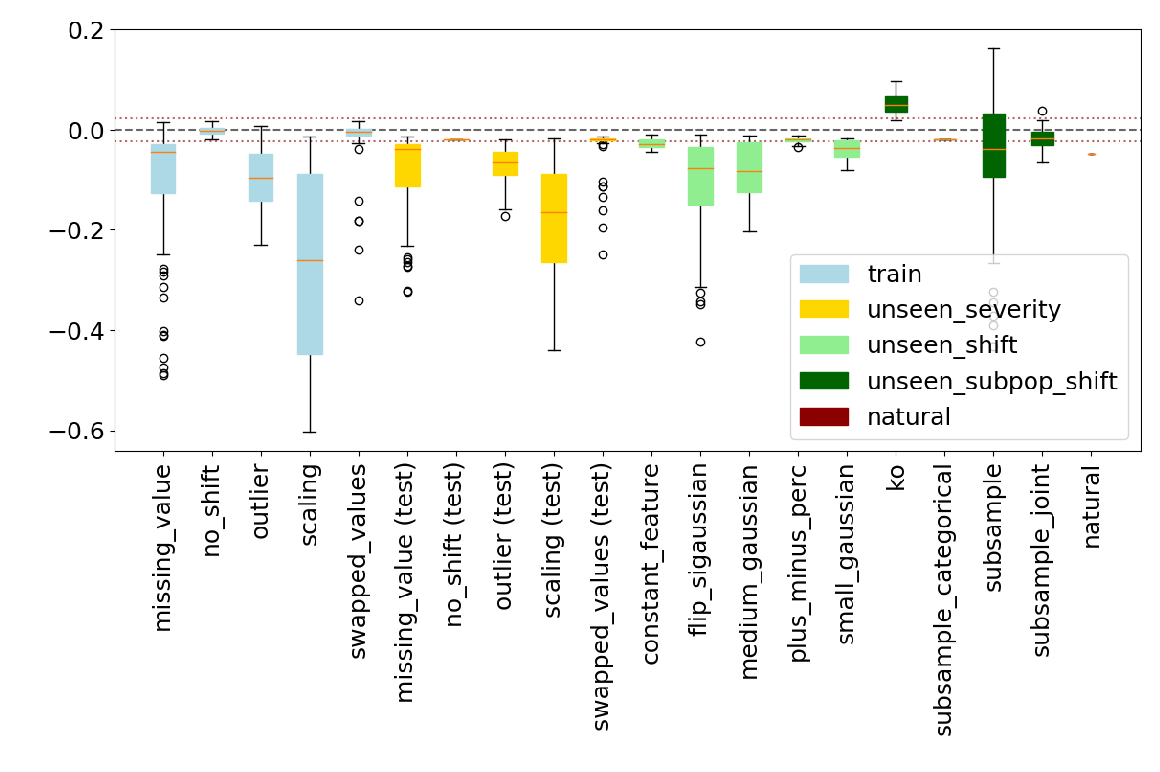

---- default_of_credit_card_clients - paper2


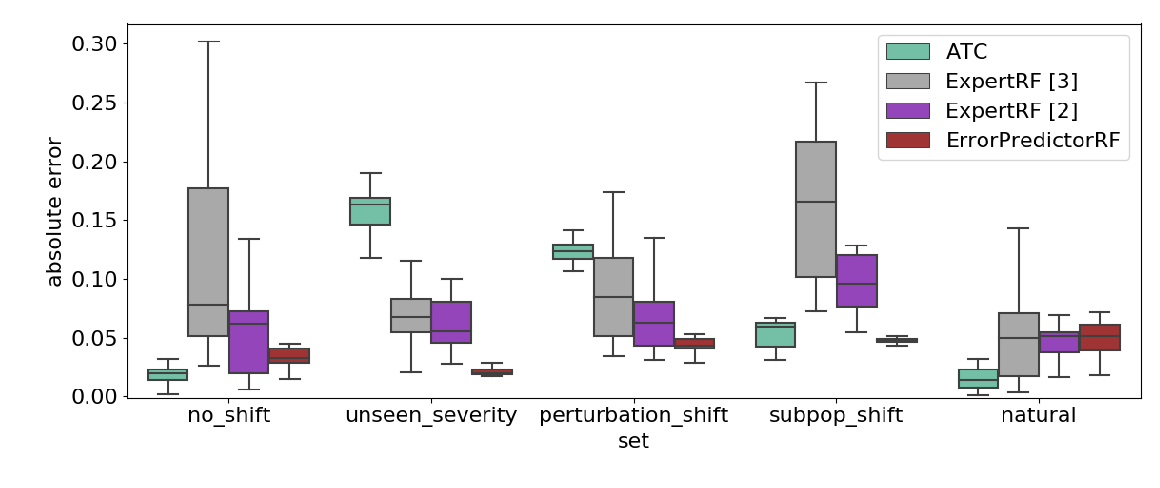

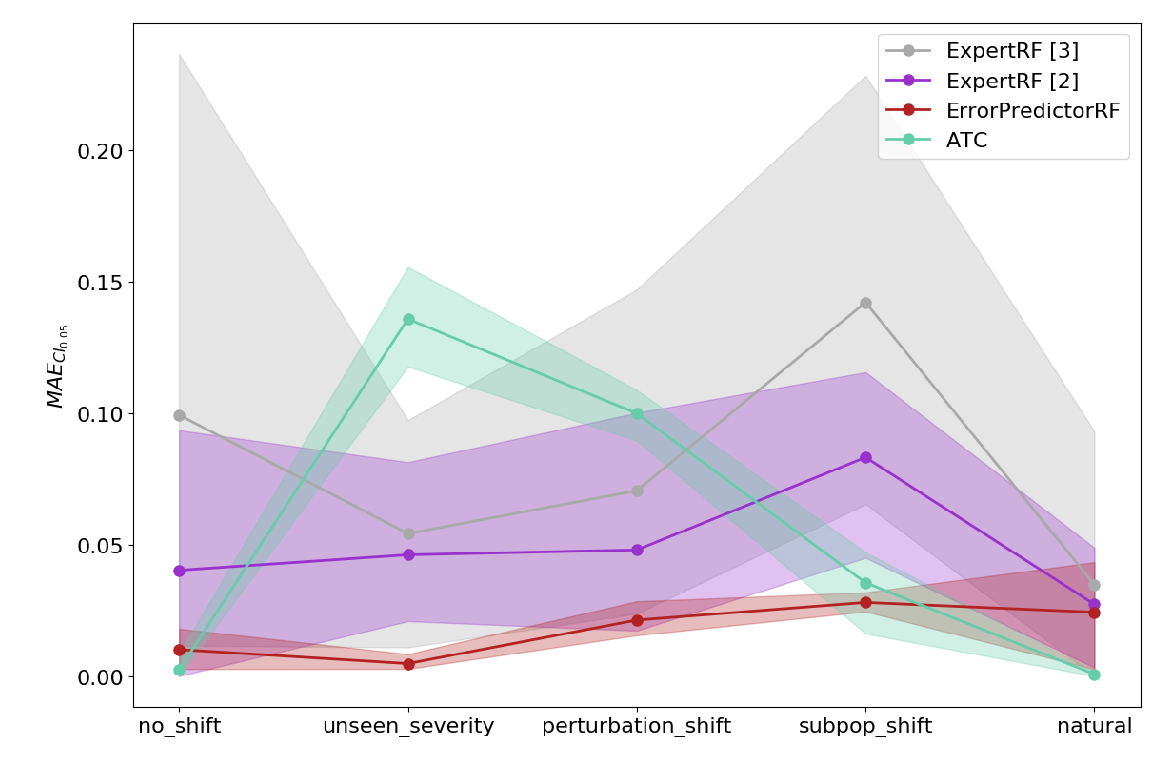

---- default_of_credit_card_clients - errpred


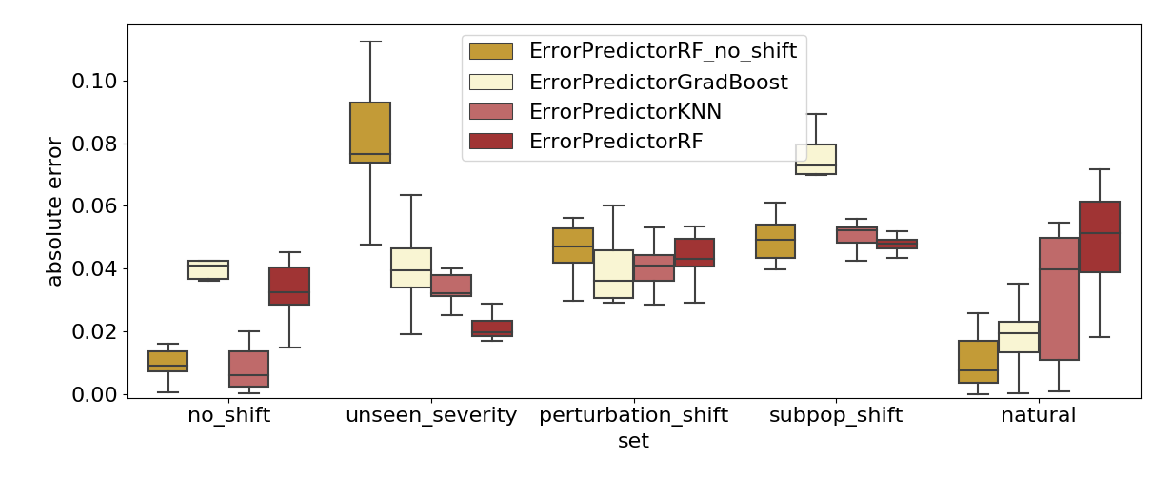

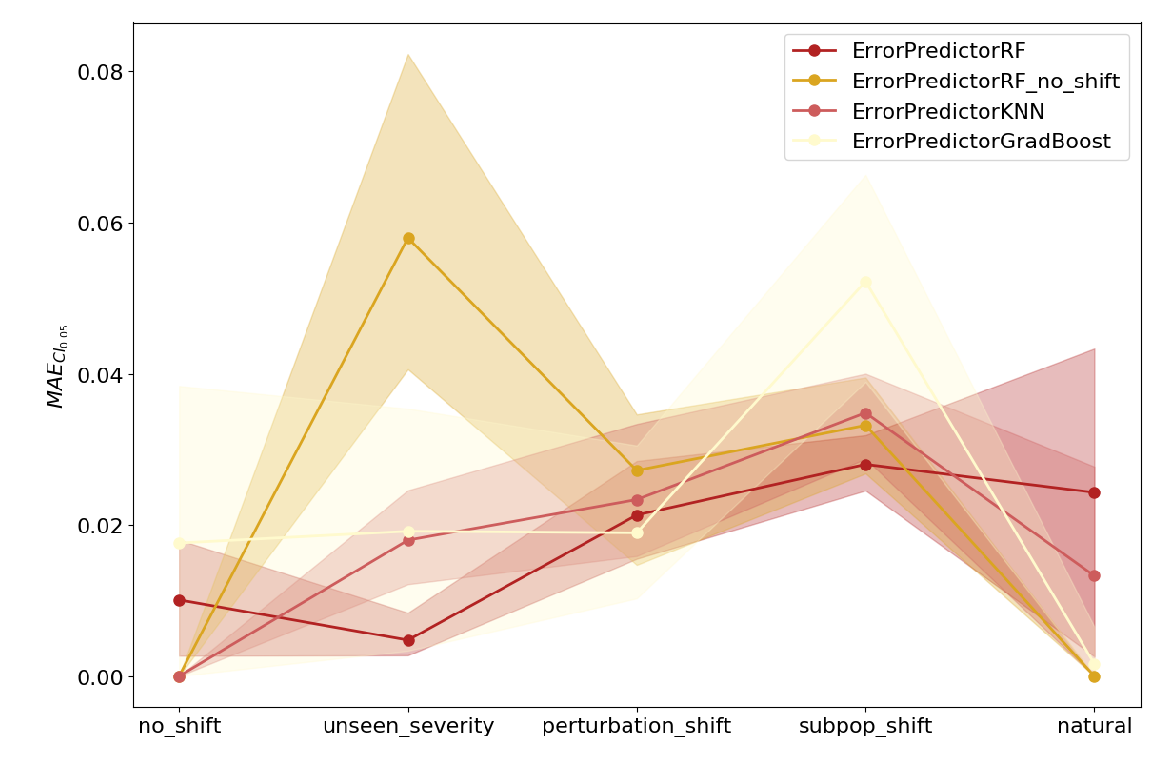

In [21]:
for i, ds in enumerate(datasets):
    
    data_fld = ds
    viz_fld = ds + '_viz'
    
    print(ds.upper())
    
    try:
        plt.figure(figsize = figsize)
        x = plt.imread(os.path.join(data_fld, 'true_drops_by_type_0.png'))
        plt.imshow(x)
        plt.axis('off')
        plt.show()

        for suffix in suffixes:
            print('---- ' + ds + ' - ' + suffix)

            plt.figure(figsize = figsize)
            x = plt.imread(os.path.join(viz_fld, 'abs_error_' + suffix + '.png'))
            plt.imshow(x)
            plt.axis('off')
            plt.show()

            plt.figure(figsize = figsize)
            x = plt.imread(os.path.join(viz_fld, 'within_ci_mae_' + suffix + '.png'))
            plt.imshow(x)
            plt.axis('off')
            plt.show()
            
    except Exception as e:
        print(e)
        continue
    